### This is a complete, end-to-end data processing flow for the external annotation for MOSE(Multimodal Online Student Engagement) project.



> **End-to-end:** From **Crowd-sourcing platform downloaded CSV** to **Packaged annotation for training**



> There are 5 main steps:
  1. Basic Data Cleaning
  2. Filtering and Validation Check
  3. Visualization
  4. Align with Video Data
  5. Packaging for Training

# **Library Prep**

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns

from math import pi
import matplotlib.pyplot as plt
from bokeh.palettes import Category20c
from bokeh.plotting import figure, show
from bokeh.transform import cumsum
from bokeh.io import export_png
import altair as alt


In [2]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.2 MB/s eta 0:00:00


In [3]:
import os
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


# **Import Data, Basic Cleaning**

1. Rid unnecessary columns
2. Turn descriptive into numeric

In [53]:
# Data Import
# Load dataset into df and drop contributor info
df = pd.read_csv("/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /all_annotations.csv") # TBA
df.dropna(axis=1, how='all')

df = df.drop(df.columns[list(range(0,7))], axis=1)
df = df.drop(df.columns[list(range(1,5))], axis=1)
title = df.pop("video_title")
df.insert(0, "video_title", title)
df

video_title  _worker_id does_the_professor_bottom_left_video_seem_engaging so_what_is_the_main_context_of_the_video  ...  \
0       06082021_Catherine_1_PengHailu_11.mp4    46557597  no_nonenergeticboring_doesnt_use_gestures_when...                                      NaN  ...   
1       06082021_Catherine_1_PengHailu_11.mp4    45598105  no_nonenergeticboring_doesnt_use_gestures_when...                                      NaN  ...   
2       06082021_Catherine_1_PengHailu_11.mp4    46676154  yes_energetic_joyful_uses_hand_gestures_when_e...                                      NaN  ...   
3       06082021_Catherine_1_PengHailu_11.mp4    45589503  no_nonenergeticboring_doesnt_use_gestures_when...                                      NaN  ...   
4       06082021_Catherine_1_PengHailu_11.mp4    46379093  no_nonenergeticboring_doesnt_use_gestures_when...                                      NaN  ...   
...                                       ...         ...                                                ...                                      ...  ...   
164906      07082021_Nigel_5_HantingXu_29.mp4    47129417  yes_energetic_joyful_uses_hand_gestures_when_e...                                      NaN  ...   
164907      07082021_Nigel_5_HantingXu_29.mp4    47017190  yes_energetic_joyful_uses_hand_gestures_when_e...                                      NaN  ...   
164908      07082021_Nigel_5_HantingXu_29.mp4    46175095  no_nonenergeticboring_doesnt_use_gestures_when...                                  amusing  ...   
164909      07082021_Nigel_5_HantingXu_29.mp4    46378674  yes_energetic_joyful_uses_hand_gestures_when_e...                                      NaN  ...   
164910      07082021_Nigel_5_HantingXu_29.mp4    45728519  yes_energetic_joyful_uses_hand_gestures_when_e...                                      NaN  ...   

        the_student_top_video_seems_focused_in_the_lecture_gold  the_student_top_video_seems_interested_in_the_lecture_gold                                          video_url  \
0                                                     NaN                                                      NaN           https://drive.google.com/file/d/1BXLXdCNLFH-Vr...   
1                                                     NaN                                                      NaN           https://drive.google.com/file/d/1BXLXdCNLFH-Vr...   
2                                                     NaN                                                      NaN           https://drive.google.com/file/d/1BXLXdCNLFH-Vr...   
3                                                     NaN                                                      NaN           https://drive.google.com/file/d/1BXLXdCNLFH-Vr...   
4                                                     NaN                                                      NaN           https://drive.google.com/file/d/1BXLXdCNLFH-Vr...   
...                                                   ...                                                      ...                                                         ...   
164906                                                NaN                                                      NaN           https://drive.google.com/file/d/1tOTK-tsRPgXML...   
164907                                                NaN                                                      NaN           https://drive.google.com/file/d/1tOTK-tsRPgXML...   
164908                                                NaN                                                      NaN           https://drive.google.com/file/d/1tOTK-tsRPgXML...   
164909                                                NaN                                                      NaN           https://drive.google.com/file/d/1tOTK-tsRPgXML...   
164910                                                NaN                                                      NaN           https://drive.google.com/file/d/1tOTK-tsRPgXML...   



In [54]:
# clean prof engagement data - No = 0, Yes = 1
def professor_engagement(row):
  if row['does_the_professor_bottom_left_video_seem_engaging']== 'no_nonenergeticboring_doesnt_use_gestures_when_explaining_monotonic_voice_tone_etc_':
    return 0
  else:
    return 1
df['does_the_professor_bottom_left_video_seem_engaging'] = df.apply(lambda row: professor_engagement(row), axis =1)
df

video_title  _worker_id  does_the_professor_bottom_left_video_seem_engaging so_what_is_the_main_context_of_the_video  ...  \
0       06082021_Catherine_1_PengHailu_11.mp4    46557597                                                  0                                       NaN  ...   
1       06082021_Catherine_1_PengHailu_11.mp4    45598105                                                  0                                       NaN  ...   
2       06082021_Catherine_1_PengHailu_11.mp4    46676154                                                  1                                       NaN  ...   
3       06082021_Catherine_1_PengHailu_11.mp4    45589503                                                  0                                       NaN  ...   
4       06082021_Catherine_1_PengHailu_11.mp4    46379093                                                  0                                       NaN  ...   
...                                       ...         ...                                                ...                                       ...  ...   
164906      07082021_Nigel_5_HantingXu_29.mp4    47129417                                                  1                                       NaN  ...   
164907      07082021_Nigel_5_HantingXu_29.mp4    47017190                                                  1                                       NaN  ...   
164908      07082021_Nigel_5_HantingXu_29.mp4    46175095                                                  0                                   amusing  ...   
164909      07082021_Nigel_5_HantingXu_29.mp4    46378674                                                  1                                       NaN  ...   
164910      07082021_Nigel_5_HantingXu_29.mp4    45728519                                                  1                                       NaN  ...   

        the_student_top_video_seems_focused_in_the_lecture_gold  the_student_top_video_seems_interested_in_the_lecture_gold                                          video_url  \
0                                                     NaN                                                      NaN           https://drive.google.com/file/d/1BXLXdCNLFH-Vr...   
1                                                     NaN                                                      NaN           https://drive.google.com/file/d/1BXLXdCNLFH-Vr...   
2                                                     NaN                                                      NaN           https://drive.google.com/file/d/1BXLXdCNLFH-Vr...   
3                                                     NaN                                                      NaN           https://drive.google.com/file/d/1BXLXdCNLFH-Vr...   
4                                                     NaN                                                      NaN           https://drive.google.com/file/d/1BXLXdCNLFH-Vr...   
...                                                   ...                                                      ...                                                         ...   
164906                                                NaN                                                      NaN           https://drive.google.com/file/d/1tOTK-tsRPgXML...   
164907                                                NaN                                                      NaN           https://drive.google.com/file/d/1tOTK-tsRPgXML...   
164908                                                NaN                                                      NaN           https://drive.google.com/file/d/1tOTK-tsRPgXML...   
164909                                                NaN                                                      NaN           https://drive.google.com/file/d/1tOTK-tsRPgXML...   
164910                                                NaN                                                      NaN           https://drive.google.com/file/d/1tOTK-tsRP

In [55]:
df.rename(columns = {'does_the_professor_bottom_left_video_seem_engaging':'professor_engaging', 'so_what_is_the_main_context_of_the_video':'other_context','the_student_top_video_looks_confused':'confused', 'the_student_top_video_seems_bored_during_the_lecture':'bored', 'the_student_top_video_seems_engaged_in_the_lecture':'engaged', 'the_student_top_video_seems_focused_in_the_lecture':'focused','the_student_top_video_seems_interested_in_the_lecture':'interested', 'what_is_the_main_context_of_the_video_check_all_that_apply':'context'}, inplace = True)
df = df[df.columns.drop(list(df.filter(regex='gold')))]
other = df.pop("other_context")
df.insert(8, "other_context", other)
df.head()

video_title  _worker_id  professor_engaging  confused  ...  interested  other_context                                            context  \
0  06082021_Catherine_1_PengHailu_11.mp4    46557597                   0         3  ...           2            NaN                    _professor_is_asking_a_question   
1  06082021_Catherine_1_PengHailu_11.mp4    45598105                   0         1  ...           4            NaN  professor_is_showing_a_video_of_someone_else_e...   
2  06082021_Catherine_1_PengHailu_11.mp4    46676154                   1         1  ...           5            NaN                _professor_is_sharing_a_funny_video   
3  06082021_Catherine_1_PengHailu_11.mp4    45589503                   0         1  ...           3            NaN          professor_is_readingexplaining_off_slides   
4  06082021_Catherine_1_PengHailu_11.mp4    46379093                   0         2  ...           3            NaN  professor_is_showing_a_video_of_someone_else_e...   

                                           video_url  
0  https://drive.google.com/file/d/1BXLXdCNLFH-Vr...  
1  https://drive.google.com/file/d/1BXLXdCNLFH-Vr...  
2  https://drive.google.com/file/d/1BXLXdCNLFH-Vr...  
3  https://drive.google.com/file/d/1BXLXdCNLFH-Vr...  
4  https://drive.google.com/file/d/1BXLXdCNLFH-Vr...  

[5 rows x 11 columns]

In [56]:
# categorize context of video
def context(row):
  row_title = row['context']

  if row_title == 'professor_is_writing':
    return 0
  elif row_title == 'professor_is_showing_a_video_of_someone_else_explaining_a_topic':
    return 1
  elif row_title == '_professor_is_sharing_a_funny_video':
    return 2
  elif row_title == 'professor_is_readingexplaining_off_slides':
    return 3
  elif row_title == '_professor_is_asking_a_question':
    return 4
  elif row_title == 'student_displayed_is_asking_a_question':
    return 5
  elif row_title == 'a_student_that_is_not_shown_in_the_video_recording_is_asking_a_question':
    return 6
  elif row_title == 'other':
    return 7

# df['context'] = df.apply(lambda row: context(row), axis =1)
df.loc[:, 'context'] = df.apply(lambda row: context(row), axis=1)
df.head()

video_title  _worker_id  professor_engaging  confused  ...  interested  other_context  context                                          video_url
0  06082021_Catherine_1_PengHailu_11.mp4    46557597                   0         3  ...           2            NaN      4.0  https://drive.google.com/file/d/1BXLXdCNLFH-Vr...
1  06082021_Catherine_1_PengHailu_11.mp4    45598105                   0         1  ...           4            NaN      1.0  https://drive.google.com/file/d/1BXLXdCNLFH-Vr...
2  06082021_Catherine_1_PengHailu_11.mp4    46676154                   1         1  ...           5            NaN      2.0  https://drive.google.com/file/d/1BXLXdCNLFH-Vr...
3  06082021_Catherine_1_PengHailu_11.mp4    45589503                   0         1  ...           3            NaN      3.0  https://drive.google.com/file/d/1BXLXdCNLFH-Vr...
4  06082021_Catherine_1_PengHailu_11.mp4    46379093                   0         2  ...           3            NaN      1.0  https://drive.google.com/file/d/1BXLXdCNLFH-Vr...

[5 rows x 11 columns]

In [57]:
df.describe()

_worker_id  professor_engaging       confused          bored        engaged        focused    interested
count  1.649110e+05       164911.000000  164911.000000  164911.000000  164911.000000  164911.000000  164911.00000
mean   4.659447e+07            0.813051       3.297421       3.018646       3.195063       3.228493       3.10989
std    4.360494e+05            0.389872       1.416253       1.202804       1.345245       1.331717       1.20532
min    4.515571e+07            0.000000       1.000000       1.000000       1.000000       1.000000       1.00000
25%    4.620000e+07            1.000000       2.000000       2.000000       2.000000       2.000000       2.00000
50%    4.663870e+07            1.000000       3.000000       3.000000       3.000000       3.000000       3.00000
75%    4.698900e+07            1.000000       5.000000       4.000000       4.000000       4.000000       4.00000
max    4.727467e+07            1.000000       5.000000       5.000000       5.000000       5.000000       5.00000

In [58]:
df = df.drop(columns = ['other_context','video_url'])

In [59]:
# Each dataframe contains 10 annotations for a video, each object of the list is a dataframe.
grouped = df.groupby("video_title")
df_list = df_list = [grouped.get_group(x) for x in grouped.groups]
df_list[0]

video_title  _worker_id  professor_engaging  confused  ...  engaged  focused  interested  context
134171  05082021_Catherine_1_Ammmy_1.mp4    46173120                   1         4  ...        4        5           4      7.0
134172  05082021_Catherine_1_Ammmy_1.mp4    46380325                   1         3  ...        5        5           3      7.0
134173  05082021_Catherine_1_Ammmy_1.mp4    46400290                   1         4  ...        4        5           3      7.0
134174  05082021_Catherine_1_Ammmy_1.mp4    46076183                   1         5  ...        3        3           4      7.0
134175  05082021_Catherine_1_Ammmy_1.mp4    46538326                   1         5  ...        4        4           4      7.0
134176  05082021_Catherine_1_Ammmy_1.mp4    46541371                   1         3  ...        3        5           3      7.0
134177  05082021_Catherine_1_Ammmy_1.mp4    47006994                   1         5  ...        3        1           1      5.0
134178  05082021_Catherine_1_Ammmy_1.mp4    46389871                   1         3  ...        4        4           3      7.0
134179  05082021_Catherine_1_Ammmy_1.mp4    46379793                   0         1  ...        3        4           2      6.0
134180  05082021_Catherine_1_Ammmy_1.mp4    46394561                   1         3  ...        5        3           3      7.0

[10 rows x 9 columns]

## Standard Deviation After Filtering

In [63]:
import matplotlib.pyplot as plt

def plot_std_distribution_per_df(df_list, emotions):
    """
    For each DataFrame in df_list, calculate the standard deviation of each emotion
    and plot a histogram of these standard deviations.

    Parameters:
    - df_list: List of DataFrames, each containing data for a specific video.
    - emotions: List of emotions to calculate the standard deviation for and plot.
    """
    std_values = {emotion: [] for emotion in emotions}

    # Calculate standard deviation for each emotion in each DataFrame
    for df in df_list:
        std = df[emotions].std()
        for emotion in emotions:
            std_values[emotion].append(std[emotion])

    # Plotting histograms of standard deviations for each emotion
    plt.figure(figsize=(15, 10))
    for i, emotion in enumerate(emotions, 1):
        plt.subplot(2, 3, i)
        plt.hist(std_values[emotion], bins=30, alpha=0.7, edgecolor='black')
        plt.title(f'Standard Deviation Distribution of {emotion}')
        plt.xlabel('Standard Deviation')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    print("Standard deviation values for each emotion across videos:")
    for emotion, values in std_values.items():
        print(f"{emotion}: {values}")

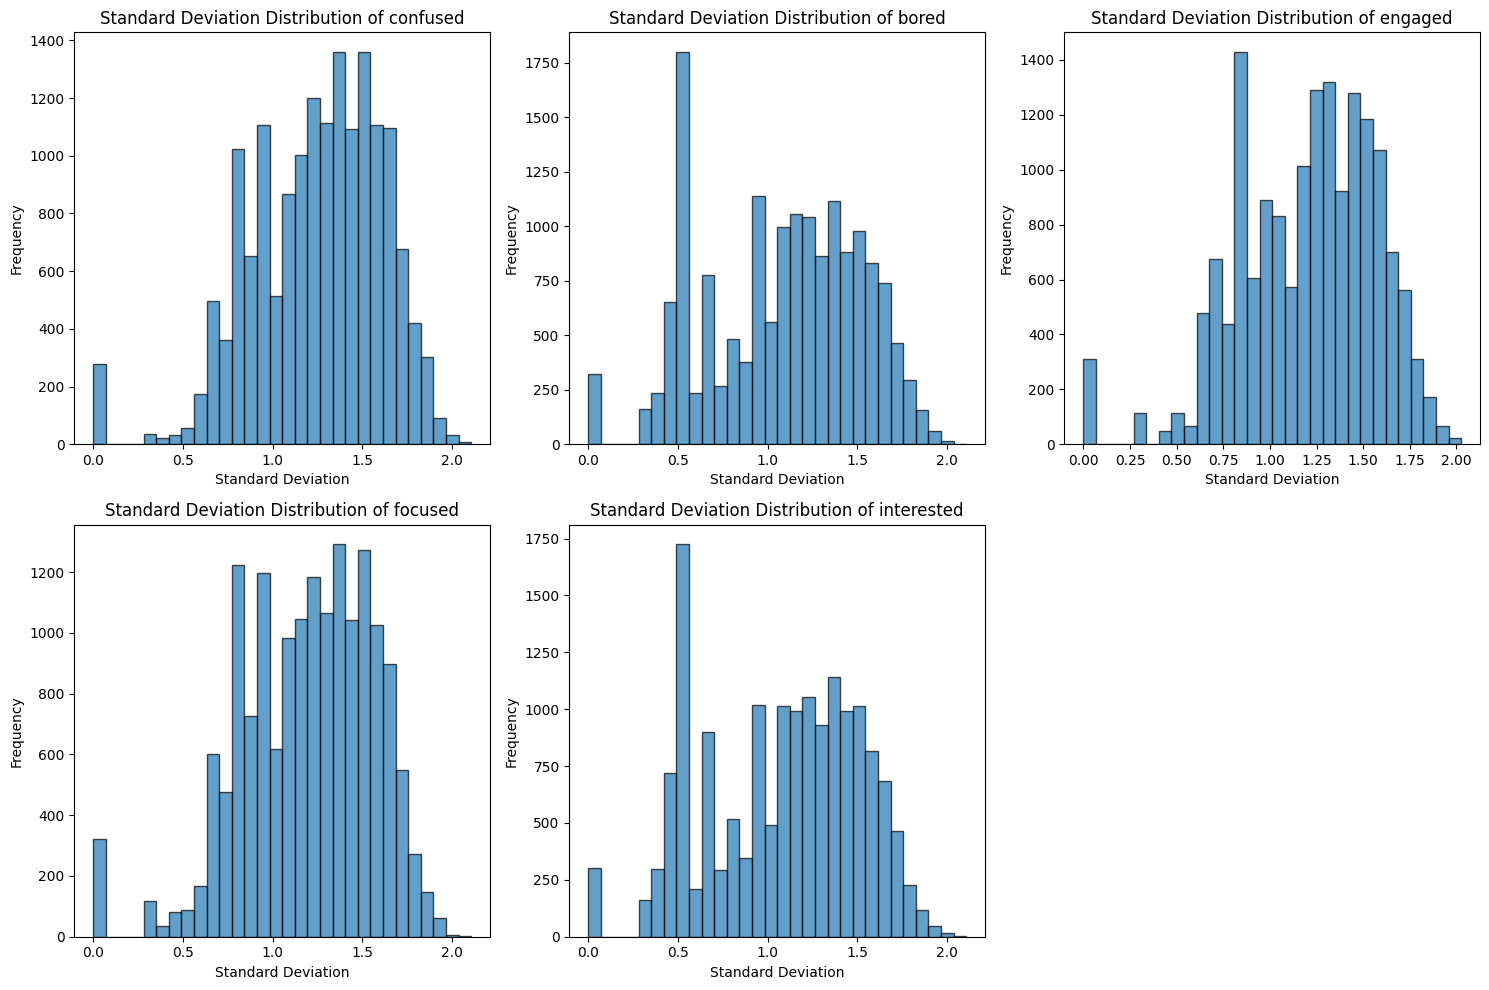

Standard deviation values for each emotion across videos:
confused: [1.2649110640673518, 1.3498971154211057, 0.9428090415820634, 1.247219128924647, 1.1972189997378646, 0.9189365834726814, 1.0801234497346432, 1.1737877907772671, 1.3984117975602022, 1.4907119849998598, 0.0, 1.577621275493231, 1.4181364924121764, 1.3165611772087666, 0.9428090415820634, 1.4298407059684812, 0.8755950357709131, 0.816496580927726, 0.7378647873726218, 0.9486832980505137, 1.1595018087284057, 1.5811388300841898, 1.1972189997378648, 1.751190071541826, 1.5776212754932308, 1.3333333333333333, 1.8257418583505536, 1.0327955589886444, 1.4757295747452437, 1.7511900715418263, 1.1972189997378646, 1.3333333333333333, 0.9486832980505138, 0.3162277660168379, 1.35400640077266, 1.0593499054713802, 1.0593499054713802, 0.0, 1.5951314818673865, 0.9660917830792959, 1.3165611772087666, 0.9428090415820634, 0.9189365834726815, 1.577621275493231, 1.5055453054181622, 1.8885620632287057, 1.505545305418162, 1.1595018087284057, 1.1972189

In [64]:
emotions = ['confused', 'bored', 'engaged', 'focused', 'interested']
plot_std_distribution_per_df(df_list, emotions)

# **Filtering**



> ICC is recognized for assessing agreement among multiple raters by evaluating the correlation between their responses for the same data. In this study, ICC was utilized to assess the agreement among the 10 annotators for each attribute of engagement individually.



> Taking ICC as a reference, we filter annotations to improve reliability with least data waste.



Steps:

> 1. Rid unnecessary columns
2. Turn descriptive into numeric values
3. Pre-filtering Reliability Test
  - Calculate ICC for each attribute
  - Report ICC in combined format
4. Perform filtering
  - Create a list of dataframes for the 10 annotations for each video
  - Dropping rows where:
    - Context does not align with the majority (mode)
    - Professor Engagement does not align with the majority (mode)
    - Has Same value everywhere (for all the engagement related columns)
    - Too much difference from other responses
      - bored (mode)
      - engage(mean)
      - focus (mean)
      - interest (mean)
      - confuse (mean)
5. [Post-filtering Reliability Test](https://docs.google.com/presentation/d/1NmbPcXM0DskdIdPgvoV9EtQly0gS2Dc3cuxj3-cOFHU/edit#slide=id.g23e149a3139_1_42)

Check also the presentation for the reason behind dropping the rows.







### **Pre-filtering Reliability Test**
1. Calculate for each of the five attributes
2. Conclude ICC in one table

### confused

In [11]:
# Calculate ICC for confused
df_confused_list = []
for i, df in enumerate(df_list):
    df_confused = df.drop(columns=['professor_engaging','bored','engaged','focused','interested'])
    df_confused_list.append(df_confused)

df_confused_list[0]

video_title  _worker_id  confused context
134171  05082021_Catherine_1_Ammmy_1.mp4    46173120         4     7.0
134172  05082021_Catherine_1_Ammmy_1.mp4    46380325         3     7.0
134173  05082021_Catherine_1_Ammmy_1.mp4    46400290         4     7.0
134174  05082021_Catherine_1_Ammmy_1.mp4    46076183         5     7.0
134175  05082021_Catherine_1_Ammmy_1.mp4    46538326         5     7.0
134176  05082021_Catherine_1_Ammmy_1.mp4    46541371         3     7.0
134177  05082021_Catherine_1_Ammmy_1.mp4    47006994         5     5.0
134178  05082021_Catherine_1_Ammmy_1.mp4    46389871         3     7.0
134179  05082021_Catherine_1_Ammmy_1.mp4    46379793         1     6.0
134180  05082021_Catherine_1_Ammmy_1.mp4    46394561         3     7.0

In [12]:
# Changing _worker_id_ so that we can consider doing ICC(1,k)
for i, df in enumerate(df_confused_list):
    df['_worker_id'] = df['_worker_id'].replace(list(df['_worker_id'].unique()), range(1, len(df['_worker_id'].unique())+1))

df_confused_list[0:2]

[                             video_title  _worker_id  confused context
 134171  05082021_Catherine_1_Ammmy_1.mp4           1         4     7.0
 134172  05082021_Catherine_1_Ammmy_1.mp4           2         3     7.0
 134173  05082021_Catherine_1_Ammmy_1.mp4           3         4     7.0
 134174  05082021_Catherine_1_Ammmy_1.mp4           4         5     7.0
 134175  05082021_Catherine_1_Ammmy_1.mp4           5         5     7.0
 134176  05082021_Catherine_1_Ammmy_1.mp4           6         3     7.0
 134177  05082021_Catherine_1_Ammmy_1.mp4           7         5     5.0
 134178  05082021_Catherine_1_Ammmy_1.mp4           8         3     7.0
 134179  05082021_Catherine_1_Ammmy_1.mp4           9         1     6.0
 134180  05082021_Catherine_1_Ammmy_1.mp4          10         3     7.0,
                               video_title  _worker_id  confused context
 131411  05082021_Catherine_1_Ammmy_10.mp4           1         3     0.0
 131412  05082021_Catherine_1_Ammmy_10.mp4           2       

In [13]:
for i, df in enumerate(df_confused_list):
    num_rows = df.shape[0]
    if num_rows != 10:
        print(f"DataFrame {i} does not have 10 rows. It has {num_rows} rows.")
        df_confused_list[i] = df_confused_list[i].head(10)
        print(df_confused_list[i])

DataFrame 10199 does not have 10 rows. It has 11 rows.
                              video_title  _worker_id  confused context
21320  21092021_Catherine_4_Ananta_18.mp4           1         3     6.0
21321  21092021_Catherine_4_Ananta_18.mp4           2         2     0.0
21322  21092021_Catherine_4_Ananta_18.mp4           3         4     3.0
21323  21092021_Catherine_4_Ananta_18.mp4           4         1     1.0
21324  21092021_Catherine_4_Ananta_18.mp4           5         2     6.0
21325  21092021_Catherine_4_Ananta_18.mp4           6         3     0.0
21326  21092021_Catherine_4_Ananta_18.mp4           7         1     7.0
21327  21092021_Catherine_4_Ananta_18.mp4           8         5     7.0
21328  21092021_Catherine_4_Ananta_18.mp4           9         5     7.0
21329  21092021_Catherine_4_Ananta_18.mp4          10         5     7.0


In [14]:
df_confused_big = pd.concat(df_confused_list)
df_confused_pivot = df_confused_big.pivot(index='video_title', columns='_worker_id', values='confused').reset_index()
melted_df_confused = df_confused_pivot.melt(id_vars=['video_title'], var_name='rater', value_name='rating')
melted_df_confused

video_title rater  rating
0         05082021_Catherine_1_Ammmy_1.mp4     1       4
1        05082021_Catherine_1_Ammmy_10.mp4     1       3
2       05082021_Catherine_1_Ammmy_100.mp4     1       4
3       05082021_Catherine_1_Ammmy_101.mp4     1       4
4       05082021_Catherine_1_Ammmy_102.mp4     1       1
...                                    ...   ...     ...
164905      23092021_Pierre_9_Sophie_5.mp4    10       4
164906      23092021_Pierre_9_Sophie_6.mp4    10       2
164907      23092021_Pierre_9_Sophie_7.mp4    10       1
164908      23092021_Pierre_9_Sophie_8.mp4    10       4
164909      23092021_Pierre_9_Sophie_9.mp4    10       3

[164910 rows x 3 columns]

In [15]:
import pingouin as pg

results_confused = pg.intraclass_corr(data=melted_df_confused, targets='video_title', raters='rater', ratings='rating',nan_policy='omit')

# Pandas display options
pd.set_option('display.max_columns', 8)
pd.set_option('display.width', 200)
# Show results
print(results_confused)

    Type              Description       ICC         F    df1     df2  pval         CI95%
0   ICC1   Single raters absolute  0.162816  2.944802  16490  148419   0.0  [0.16, 0.17]
1   ICC2     Single random raters  0.163017  2.953264  16490  148410   0.0  [0.16, 0.17]
2   ICC3      Single fixed raters  0.163408  2.953264  16490  148410   0.0  [0.16, 0.17]
3  ICC1k  Average raters absolute  0.660419  2.944802  16490  148419   0.0  [0.65, 0.67]
4  ICC2k    Average random raters  0.660749  2.953264  16490  148410   0.0  [0.65, 0.67]
5  ICC3k     Average fixed raters  0.661392  2.953264  16490  148410   0.0  [0.65, 0.67]


In [16]:
icc1k_confused = results_confused[results_confused['Type'] == 'ICC1k'].reset_index(drop=True)
icc1k_confused

Type              Description       ICC         F    df1     df2  pval         CI95%
0  ICC1k  Average raters absolute  0.660419  2.944802  16490  148419   0.0  [0.65, 0.67]

### bored

In [17]:
df_bored_list = []
for i, df in enumerate(df_list):
    df_bored = df.drop(columns=['professor_engaging','confused','engaged','focused','interested'])
    df_bored_list.append(df_bored)

df_bored_list[0]

video_title  _worker_id  bored context
134171  05082021_Catherine_1_Ammmy_1.mp4    46173120      4     7.0
134172  05082021_Catherine_1_Ammmy_1.mp4    46380325      3     7.0
134173  05082021_Catherine_1_Ammmy_1.mp4    46400290      3     7.0
134174  05082021_Catherine_1_Ammmy_1.mp4    46076183      4     7.0
134175  05082021_Catherine_1_Ammmy_1.mp4    46538326      4     7.0
134176  05082021_Catherine_1_Ammmy_1.mp4    46541371      4     7.0
134177  05082021_Catherine_1_Ammmy_1.mp4    47006994      2     5.0
134178  05082021_Catherine_1_Ammmy_1.mp4    46389871      3     7.0
134179  05082021_Catherine_1_Ammmy_1.mp4    46379793      1     6.0
134180  05082021_Catherine_1_Ammmy_1.mp4    46394561      4     7.0

In [18]:
# Changing _worker_id_ so that we can consider doing ICC(1,k)
for i, df in enumerate(df_bored_list):
    df['_worker_id'] = df['_worker_id'].replace(list(df['_worker_id'].unique()), range(1, len(df['_worker_id'].unique())+1))

df_bored_list[0:2]


[                             video_title  _worker_id  bored context
 134171  05082021_Catherine_1_Ammmy_1.mp4           1      4     7.0
 134172  05082021_Catherine_1_Ammmy_1.mp4           2      3     7.0
 134173  05082021_Catherine_1_Ammmy_1.mp4           3      3     7.0
 134174  05082021_Catherine_1_Ammmy_1.mp4           4      4     7.0
 134175  05082021_Catherine_1_Ammmy_1.mp4           5      4     7.0
 134176  05082021_Catherine_1_Ammmy_1.mp4           6      4     7.0
 134177  05082021_Catherine_1_Ammmy_1.mp4           7      2     5.0
 134178  05082021_Catherine_1_Ammmy_1.mp4           8      3     7.0
 134179  05082021_Catherine_1_Ammmy_1.mp4           9      1     6.0
 134180  05082021_Catherine_1_Ammmy_1.mp4          10      4     7.0,
                               video_title  _worker_id  bored context
 131411  05082021_Catherine_1_Ammmy_10.mp4           1      3     0.0
 131412  05082021_Catherine_1_Ammmy_10.mp4           2      3     3.0
 131413  05082021_Catherine_1_

In [19]:
for i, df in enumerate(df_bored_list):
    num_rows = df.shape[0]
    if num_rows != 10:
        print(f"DataFrame {i} does not have 10 rows. It has {num_rows} rows.")
        df_bored_list[i] = df_bored_list[i].head(10)

  # Noticed that some videos have more than 10 annnotations, due to unknown reason

DataFrame 10199 does not have 10 rows. It has 11 rows.


In [20]:
df_bored_big = pd.concat(df_bored_list)
df_bored_pivot = df_bored_big.pivot(index='video_title', columns='_worker_id', values='bored').reset_index()
melted_df_bored = df_bored_pivot.melt(id_vars=['video_title'], var_name='rater', value_name='rating')
melted_df_bored
# melted_df_bored should be 164910 rows × 3 columns

video_title rater  rating
0         05082021_Catherine_1_Ammmy_1.mp4     1       4
1        05082021_Catherine_1_Ammmy_10.mp4     1       3
2       05082021_Catherine_1_Ammmy_100.mp4     1       1
3       05082021_Catherine_1_Ammmy_101.mp4     1       4
4       05082021_Catherine_1_Ammmy_102.mp4     1       1
...                                    ...   ...     ...
164905      23092021_Pierre_9_Sophie_5.mp4    10       4
164906      23092021_Pierre_9_Sophie_6.mp4    10       1
164907      23092021_Pierre_9_Sophie_7.mp4    10       2
164908      23092021_Pierre_9_Sophie_8.mp4    10       4
164909      23092021_Pierre_9_Sophie_9.mp4    10       3

[164910 rows x 3 columns]

In [21]:
results_bored = pg.intraclass_corr(data=melted_df_bored, targets='video_title', raters='rater', ratings='rating',nan_policy='omit')

# Pandas display options
pd.set_option('display.max_columns', 8)
pd.set_option('display.width', 200)
# Show results
print(results_bored)

    Type              Description       ICC         F    df1     df2  pval         CI95%
0   ICC1   Single raters absolute  0.063282  1.675570  16490  148419   0.0  [0.06, 0.07]
1   ICC2     Single random raters  0.063403  1.677884  16490  148410   0.0  [0.06, 0.07]
2   ICC3      Single fixed raters  0.063485  1.677884  16490  148410   0.0  [0.06, 0.07]
3  ICC1k  Average raters absolute  0.403188  1.675570  16490  148419   0.0  [0.39, 0.42]
4  ICC2k    Average random raters  0.403679  1.677884  16490  148410   0.0  [0.39, 0.42]
5  ICC3k     Average fixed raters  0.404011  1.677884  16490  148410   0.0  [0.39, 0.42]


In [22]:
icc1k_bored = results_bored[results_bored['Type'] == 'ICC1k'].reset_index(drop=True)
icc1k_bored

Type              Description       ICC        F    df1     df2  pval         CI95%
0  ICC1k  Average raters absolute  0.403188  1.67557  16490  148419   0.0  [0.39, 0.42]

### engaged

In [23]:
df_engaged_list = []
for i, df in enumerate(df_list):
    df_engaged = df.drop(columns=['professor_engaging','confused','bored','focused','interested'])
    df_engaged_list.append(df_engaged)

In [24]:
# Changing _worker_id_ so that we can consider doing ICC(1,k)
for i, df in enumerate(df_engaged_list):
    df['_worker_id'] = df['_worker_id'].replace(list(df['_worker_id'].unique()), range(1, len(df['_worker_id'].unique())+1))

df_engaged_list[0:2]

[                             video_title  _worker_id  engaged context
 134171  05082021_Catherine_1_Ammmy_1.mp4           1        4     7.0
 134172  05082021_Catherine_1_Ammmy_1.mp4           2        5     7.0
 134173  05082021_Catherine_1_Ammmy_1.mp4           3        4     7.0
 134174  05082021_Catherine_1_Ammmy_1.mp4           4        3     7.0
 134175  05082021_Catherine_1_Ammmy_1.mp4           5        4     7.0
 134176  05082021_Catherine_1_Ammmy_1.mp4           6        3     7.0
 134177  05082021_Catherine_1_Ammmy_1.mp4           7        3     5.0
 134178  05082021_Catherine_1_Ammmy_1.mp4           8        4     7.0
 134179  05082021_Catherine_1_Ammmy_1.mp4           9        3     6.0
 134180  05082021_Catherine_1_Ammmy_1.mp4          10        5     7.0,
                               video_title  _worker_id  engaged context
 131411  05082021_Catherine_1_Ammmy_10.mp4           1        4     0.0
 131412  05082021_Catherine_1_Ammmy_10.mp4           2        3     3.0
 1

In [25]:
for i, df in enumerate(df_engaged_list):
    num_rows = df.shape[0]
    if num_rows != 10:
        print(f"DataFrame {i} does not have 10 rows. It has {num_rows} rows.")
        df_engaged_list[i] = df_engaged_list[i].head(10)
        print(df_engaged_list[i])

DataFrame 10199 does not have 10 rows. It has 11 rows.
                              video_title  _worker_id  engaged context
21320  21092021_Catherine_4_Ananta_18.mp4           1        4     6.0
21321  21092021_Catherine_4_Ananta_18.mp4           2        5     0.0
21322  21092021_Catherine_4_Ananta_18.mp4           3        1     3.0
21323  21092021_Catherine_4_Ananta_18.mp4           4        3     1.0
21324  21092021_Catherine_4_Ananta_18.mp4           5        1     6.0
21325  21092021_Catherine_4_Ananta_18.mp4           6        2     0.0
21326  21092021_Catherine_4_Ananta_18.mp4           7        5     7.0
21327  21092021_Catherine_4_Ananta_18.mp4           8        3     7.0
21328  21092021_Catherine_4_Ananta_18.mp4           9        3     7.0
21329  21092021_Catherine_4_Ananta_18.mp4          10        3     7.0


In [26]:
df_engaged_big = pd.concat(df_engaged_list)
df_engaged_pivot = df_engaged_big.pivot(index='video_title', columns='_worker_id', values='engaged').reset_index()
melted_df_engaged = df_engaged_pivot.melt(id_vars=['video_title'], var_name='rater', value_name='rating')
melted_df_engaged

video_title rater  rating
0         05082021_Catherine_1_Ammmy_1.mp4     1       4
1        05082021_Catherine_1_Ammmy_10.mp4     1       4
2       05082021_Catherine_1_Ammmy_100.mp4     1       2
3       05082021_Catherine_1_Ammmy_101.mp4     1       3
4       05082021_Catherine_1_Ammmy_102.mp4     1       5
...                                    ...   ...     ...
164905      23092021_Pierre_9_Sophie_5.mp4    10       4
164906      23092021_Pierre_9_Sophie_6.mp4    10       1
164907      23092021_Pierre_9_Sophie_7.mp4    10       2
164908      23092021_Pierre_9_Sophie_8.mp4    10       3
164909      23092021_Pierre_9_Sophie_9.mp4    10       3

[164910 rows x 3 columns]

In [27]:
results_engaged = pg.intraclass_corr(data=melted_df_engaged, targets='video_title', raters='rater', ratings='rating',nan_policy='omit')

# Pandas display options
pd.set_option('display.max_columns', 8)
pd.set_option('display.width', 200)
# Show results
print(results_engaged)

    Type              Description       ICC         F    df1     df2  pval         CI95%
0   ICC1   Single raters absolute  0.130159  2.496350  16490  148419   0.0  [0.13, 0.13]
1   ICC2     Single random raters  0.130248  2.499316  16490  148410   0.0  [0.13, 0.13]
2   ICC3      Single fixed raters  0.130383  2.499316  16490  148410   0.0  [0.13, 0.13]
3  ICC1k  Average raters absolute  0.599415  2.496350  16490  148419   0.0  [0.59, 0.61]
4  ICC2k    Average random raters  0.599605  2.499316  16490  148410   0.0  [0.59, 0.61]
5  ICC3k     Average fixed raters  0.599891  2.499316  16490  148410   0.0  [0.59, 0.61]


In [28]:
icc1k_engaged = results_engaged[results_engaged['Type'] == 'ICC1k'].reset_index(drop=True)
icc1k_engaged

Type              Description       ICC        F    df1     df2  pval         CI95%
0  ICC1k  Average raters absolute  0.599415  2.49635  16490  148419   0.0  [0.59, 0.61]

### focused

In [29]:
df_focused_list = []
for i, df in enumerate(df_list):
    df_focused = df.drop(columns=['professor_engaging','confused','bored','engaged','interested'])
    df_focused_list.append(df_focused)

In [30]:
# Changing _worker_id_ so that we can consider doing ICC(1,k)
for i, df in enumerate(df_focused_list):
    df['_worker_id'] = df['_worker_id'].replace(list(df['_worker_id'].unique()), range(1, len(df['_worker_id'].unique())+1))

df_focused_list[0:2]

[                             video_title  _worker_id  focused context
 134171  05082021_Catherine_1_Ammmy_1.mp4           1        5     7.0
 134172  05082021_Catherine_1_Ammmy_1.mp4           2        5     7.0
 134173  05082021_Catherine_1_Ammmy_1.mp4           3        5     7.0
 134174  05082021_Catherine_1_Ammmy_1.mp4           4        3     7.0
 134175  05082021_Catherine_1_Ammmy_1.mp4           5        4     7.0
 134176  05082021_Catherine_1_Ammmy_1.mp4           6        5     7.0
 134177  05082021_Catherine_1_Ammmy_1.mp4           7        1     5.0
 134178  05082021_Catherine_1_Ammmy_1.mp4           8        4     7.0
 134179  05082021_Catherine_1_Ammmy_1.mp4           9        4     6.0
 134180  05082021_Catherine_1_Ammmy_1.mp4          10        3     7.0,
                               video_title  _worker_id  focused context
 131411  05082021_Catherine_1_Ammmy_10.mp4           1        3     0.0
 131412  05082021_Catherine_1_Ammmy_10.mp4           2        3     3.0
 1

In [31]:
for i, df in enumerate(df_focused_list):
    num_rows = df.shape[0]
    if num_rows != 10:
        print(f"DataFrame {i} does not have 10 rows. It has {num_rows} rows.")
        df_focused_list[i] = df_focused_list[i].head(10)
        print(df_focused_list[i])

DataFrame 10199 does not have 10 rows. It has 11 rows.
                              video_title  _worker_id  focused context
21320  21092021_Catherine_4_Ananta_18.mp4           1        3     6.0
21321  21092021_Catherine_4_Ananta_18.mp4           2        1     0.0
21322  21092021_Catherine_4_Ananta_18.mp4           3        1     3.0
21323  21092021_Catherine_4_Ananta_18.mp4           4        1     1.0
21324  21092021_Catherine_4_Ananta_18.mp4           5        1     6.0
21325  21092021_Catherine_4_Ananta_18.mp4           6        1     0.0
21326  21092021_Catherine_4_Ananta_18.mp4           7        3     7.0
21327  21092021_Catherine_4_Ananta_18.mp4           8        3     7.0
21328  21092021_Catherine_4_Ananta_18.mp4           9        3     7.0
21329  21092021_Catherine_4_Ananta_18.mp4          10        3     7.0


In [32]:
df_focused_big = pd.concat(df_focused_list)
df_focused_pivot = df_focused_big.pivot(index='video_title', columns='_worker_id', values='focused').reset_index()
melted_df_focused = df_focused_pivot.melt(id_vars=['video_title'], var_name='rater', value_name='rating')
melted_df_focused

video_title rater  rating
0         05082021_Catherine_1_Ammmy_1.mp4     1       5
1        05082021_Catherine_1_Ammmy_10.mp4     1       3
2       05082021_Catherine_1_Ammmy_100.mp4     1       2
3       05082021_Catherine_1_Ammmy_101.mp4     1       3
4       05082021_Catherine_1_Ammmy_102.mp4     1       3
...                                    ...   ...     ...
164905      23092021_Pierre_9_Sophie_5.mp4    10       5
164906      23092021_Pierre_9_Sophie_6.mp4    10       3
164907      23092021_Pierre_9_Sophie_7.mp4    10       1
164908      23092021_Pierre_9_Sophie_8.mp4    10       5
164909      23092021_Pierre_9_Sophie_9.mp4    10       3

[164910 rows x 3 columns]

In [33]:
results_focused = pg.intraclass_corr(data=melted_df_focused, targets='video_title', raters='rater', ratings='rating',nan_policy='omit')

# Pandas display options
pd.set_option('display.max_columns', 8)
pd.set_option('display.width', 200)
# Show results
print(results_focused)

    Type              Description       ICC         F    df1     df2  pval         CI95%
0   ICC1   Single raters absolute  0.129306  2.485091  16490  148419   0.0  [0.13, 0.13]
1   ICC2     Single random raters  0.129353  2.486621  16490  148410   0.0  [0.13, 0.13]
2   ICC3      Single fixed raters  0.129422  2.486621  16490  148410   0.0  [0.13, 0.13]
3  ICC1k  Average raters absolute  0.597600  2.485091  16490  148419   0.0  [0.59, 0.61]
4  ICC2k    Average random raters  0.597700  2.486621  16490  148410   0.0  [0.59, 0.61]
5  ICC3k     Average fixed raters  0.597848  2.486621  16490  148410   0.0  [0.59, 0.61]


In [34]:
icc1k_focused = results_focused[results_focused['Type'] == 'ICC1k'].reset_index(drop=True)
icc1k_focused

Type              Description     ICC         F    df1     df2  pval         CI95%
0  ICC1k  Average raters absolute  0.5976  2.485091  16490  148419   0.0  [0.59, 0.61]

### interested

In [35]:
df_interested_list = []
for i, df in enumerate(df_list):
    df_interested = df.drop(columns=['professor_engaging','confused','bored','engaged','focused'])
    df_interested_list.append(df_interested)

In [36]:
# Changing _worker_id_ so that we can consider doing ICC(1,k)
for i, df in enumerate(df_interested_list):
    df['_worker_id'] = df['_worker_id'].replace(list(df['_worker_id'].unique()), range(1, len(df['_worker_id'].unique())+1))

df_interested_list[0:2]

[                             video_title  _worker_id  interested context
 134171  05082021_Catherine_1_Ammmy_1.mp4           1           4     7.0
 134172  05082021_Catherine_1_Ammmy_1.mp4           2           3     7.0
 134173  05082021_Catherine_1_Ammmy_1.mp4           3           3     7.0
 134174  05082021_Catherine_1_Ammmy_1.mp4           4           4     7.0
 134175  05082021_Catherine_1_Ammmy_1.mp4           5           4     7.0
 134176  05082021_Catherine_1_Ammmy_1.mp4           6           3     7.0
 134177  05082021_Catherine_1_Ammmy_1.mp4           7           1     5.0
 134178  05082021_Catherine_1_Ammmy_1.mp4           8           3     7.0
 134179  05082021_Catherine_1_Ammmy_1.mp4           9           2     6.0
 134180  05082021_Catherine_1_Ammmy_1.mp4          10           3     7.0,
                               video_title  _worker_id  interested context
 131411  05082021_Catherine_1_Ammmy_10.mp4           1           3     0.0
 131412  05082021_Catherine_1_Ammmy

In [37]:
for i, df in enumerate(df_interested_list):
    num_rows = df.shape[0]
    if num_rows != 10:
        print(f"DataFrame {i} does not have 10 rows. It has {num_rows} rows.")
        df_interested_list[i] = df_interested_list[i].head(10)
        print(df_interested_list[i])

DataFrame 10199 does not have 10 rows. It has 11 rows.
                              video_title  _worker_id  interested context
21320  21092021_Catherine_4_Ananta_18.mp4           1           3     6.0
21321  21092021_Catherine_4_Ananta_18.mp4           2           1     0.0
21322  21092021_Catherine_4_Ananta_18.mp4           3           5     3.0
21323  21092021_Catherine_4_Ananta_18.mp4           4           2     1.0
21324  21092021_Catherine_4_Ananta_18.mp4           5           1     6.0
21325  21092021_Catherine_4_Ananta_18.mp4           6           3     0.0
21326  21092021_Catherine_4_Ananta_18.mp4           7           4     7.0
21327  21092021_Catherine_4_Ananta_18.mp4           8           4     7.0
21328  21092021_Catherine_4_Ananta_18.mp4           9           4     7.0
21329  21092021_Catherine_4_Ananta_18.mp4          10           4     7.0


In [38]:
df_interested_big = pd.concat(df_interested_list)
df_interested_pivot = df_interested_big.pivot(index='video_title', columns='_worker_id', values='interested').reset_index()
melted_df_interested = df_interested_pivot.melt(id_vars=['video_title'], var_name='rater', value_name='rating')
melted_df_interested

video_title rater  rating
0         05082021_Catherine_1_Ammmy_1.mp4     1       4
1        05082021_Catherine_1_Ammmy_10.mp4     1       3
2       05082021_Catherine_1_Ammmy_100.mp4     1       5
3       05082021_Catherine_1_Ammmy_101.mp4     1       4
4       05082021_Catherine_1_Ammmy_102.mp4     1       2
...                                    ...   ...     ...
164905      23092021_Pierre_9_Sophie_5.mp4    10       3
164906      23092021_Pierre_9_Sophie_6.mp4    10       5
164907      23092021_Pierre_9_Sophie_7.mp4    10       5
164908      23092021_Pierre_9_Sophie_8.mp4    10       3
164909      23092021_Pierre_9_Sophie_9.mp4    10       4

[164910 rows x 3 columns]

In [39]:
results_interested = pg.intraclass_corr(data=melted_df_interested, targets='video_title', raters='rater', ratings='rating',nan_policy='omit')

# Pandas display options
pd.set_option('display.max_columns', 8)
pd.set_option('display.width', 200)
# Show results
print(results_interested)

    Type              Description       ICC         F    df1     df2  pval         CI95%
0   ICC1   Single raters absolute  0.078309  1.849625  16490  148419   0.0  [0.07, 0.08]
1   ICC2     Single random raters  0.078341  1.850327  16490  148410   0.0  [0.07, 0.08]
2   ICC3      Single fixed raters  0.078369  1.850327  16490  148410   0.0  [0.07, 0.08]
3  ICC1k  Average raters absolute  0.459350  1.849625  16490  148419   0.0  [0.45, 0.47]
4  ICC2k    Average random raters  0.459461  1.850327  16490  148410   0.0  [0.45, 0.47]
5  ICC3k     Average fixed raters  0.459555  1.850327  16490  148410   0.0  [0.45, 0.47]


In [40]:
icc1k_interested = results_interested[results_interested['Type'] == 'ICC1k'].reset_index(drop=True)
icc1k_interested

Type              Description      ICC         F    df1     df2  pval         CI95%
0  ICC1k  Average raters absolute  0.45935  1.849625  16490  148419   0.0  [0.45, 0.47]

### Before Filtering, the ICC of each attributes is concluded in this table

In [41]:
icc1k_confused['Attribute'] = 'icc1k_confused'
icc1k_bored['Attribute'] = 'icc1k_bored'
icc1k_engaged['Attribute'] = 'icc1k_engaged'
icc1k_focused['Attribute'] = 'icc1k_focused'
icc1k_interested['Attribute'] = 'icc1k_interested'

concatenated_ICC_prior_df = pd.concat([icc1k_confused,icc1k_bored,icc1k_engaged,icc1k_focused,icc1k_interested],ignore_index=True)
concatenated_ICC_prior_df.columns


Index(['Type', 'Description', 'ICC', 'F', 'df1', 'df2', 'pval', 'CI95%', 'Attribute'], dtype='object')

In [42]:
concatenated_ICC_prior_df = concatenated_ICC_prior_df[['Attribute', 'ICC', 'CI95%','F','df1','df2','pval']]

print(concatenated_ICC_prior_df)

          Attribute       ICC         CI95%         F    df1     df2  pval
0    icc1k_confused  0.660419  [0.65, 0.67]  2.944802  16490  148419   0.0
1       icc1k_bored  0.403188  [0.39, 0.42]  1.675570  16490  148419   0.0
2     icc1k_engaged  0.599415  [0.59, 0.61]  2.496350  16490  148419   0.0
3     icc1k_focused  0.597600  [0.59, 0.61]  2.485091  16490  148419   0.0
4  icc1k_interested  0.459350  [0.45, 0.47]  1.849625  16490  148419   0.0


### Standard Deviation

### **Filtering**


In [43]:
# Context
# df_list --> df_list_edit
df_list_edit = []
for i, df in enumerate(df_list):
    mode_context = df['context'].mode()[0]
    df_edit = df[df['context']==mode_context]
    df_list_edit.append(df_edit)

df_list_edit[0]

video_title  _worker_id  professor_engaging  confused  ...  engaged  focused  interested  context
134171  05082021_Catherine_1_Ammmy_1.mp4    46173120                   1         4  ...        4        5           4      7.0
134172  05082021_Catherine_1_Ammmy_1.mp4    46380325                   1         3  ...        5        5           3      7.0
134173  05082021_Catherine_1_Ammmy_1.mp4    46400290                   1         4  ...        4        5           3      7.0
134174  05082021_Catherine_1_Ammmy_1.mp4    46076183                   1         5  ...        3        3           4      7.0
134175  05082021_Catherine_1_Ammmy_1.mp4    46538326                   1         5  ...        4        4           4      7.0
134176  05082021_Catherine_1_Ammmy_1.mp4    46541371                   1         3  ...        3        5           3      7.0
134178  05082021_Catherine_1_Ammmy_1.mp4    46389871                   1         3  ...        4        4           3      7.0
134180  05082021_Catherine_1_Ammmy_1.mp4    46394561                   1         3  ...        5        3           3      7.0

[8 rows x 9 columns]

In [44]:
# Prof_Engage
# df_list --> df_list_edit
df_list_edit2 = []
for i, df in enumerate(df_list_edit):
    mode_prof_engage = df['professor_engaging'].mode()[0]
    df_edit = df[df['professor_engaging']==mode_prof_engage]
    df_list_edit2.append(df_edit)

df_list_edit2[0]

video_title  _worker_id  professor_engaging  confused  ...  engaged  focused  interested  context
134171  05082021_Catherine_1_Ammmy_1.mp4    46173120                   1         4  ...        4        5           4      7.0
134172  05082021_Catherine_1_Ammmy_1.mp4    46380325                   1         3  ...        5        5           3      7.0
134173  05082021_Catherine_1_Ammmy_1.mp4    46400290                   1         4  ...        4        5           3      7.0
134174  05082021_Catherine_1_Ammmy_1.mp4    46076183                   1         5  ...        3        3           4      7.0
134175  05082021_Catherine_1_Ammmy_1.mp4    46538326                   1         5  ...        4        4           4      7.0
134176  05082021_Catherine_1_Ammmy_1.mp4    46541371                   1         3  ...        3        5           3      7.0
134178  05082021_Catherine_1_Ammmy_1.mp4    46389871                   1         3  ...        4        4           3      7.0
134180  05082021_Catherine_1_Ammmy_1.mp4    46394561                   1         3  ...        5        3           3      7.0

[8 rows x 9 columns]

In [45]:
# Same Value Everywhere
# df_list --> df_list_edit
df_list_edit3 = []
for i, df in enumerate(df_list_edit2):
    df_edit = df.drop(df[(df['confused'] == df['bored']) &
                         (df['confused'] == df['engaged']) &
                         (df['confused'] == df['focused']) &
                         (df['confused'] == df['interested'])].index, inplace=False)
    df_list_edit3.append(df_edit)

df_list_edit3[0]


video_title  _worker_id  professor_engaging  confused  ...  engaged  focused  interested  context
134171  05082021_Catherine_1_Ammmy_1.mp4    46173120                   1         4  ...        4        5           4      7.0
134172  05082021_Catherine_1_Ammmy_1.mp4    46380325                   1         3  ...        5        5           3      7.0
134173  05082021_Catherine_1_Ammmy_1.mp4    46400290                   1         4  ...        4        5           3      7.0
134174  05082021_Catherine_1_Ammmy_1.mp4    46076183                   1         5  ...        3        3           4      7.0
134175  05082021_Catherine_1_Ammmy_1.mp4    46538326                   1         5  ...        4        4           4      7.0
134176  05082021_Catherine_1_Ammmy_1.mp4    46541371                   1         3  ...        3        5           3      7.0
134178  05082021_Catherine_1_Ammmy_1.mp4    46389871                   1         3  ...        4        4           3      7.0
134180  05082021_Catherine_1_Ammmy_1.mp4    46394561                   1         3  ...        5        3           3      7.0

[8 rows x 9 columns]

In [46]:
# Assume the list of dataframes is named 'df_list'
df_list_edit3half = []
for i, df in enumerate(df_list_edit3):
    if len(df) > 0:
        df_list_edit3half.append(df)


In [47]:
# Too much difference from other Response
df_list_edit4 = []

for i, df in enumerate(df_list_edit3half):
    mode_bored = df['bored'].mode()[0]
    average_engage = df['engaged'].mean()
    average_focus = df['focused'].mean()
    average_interest = df['interested'].mean()
    average_confuse = df['confused'].mean()
    df_edit = df[df['bored']-mode_bored<1.5]
    df_edit = df_edit[mode_bored - df_edit['bored']<1.5]
    df_edit = df_edit[average_engage-df_edit['engaged']<2.5]
    df_edit = df_edit[df_edit['engaged']-average_engage<2.5]
    df_edit = df_edit[average_focus-df_edit['focused']<2.5]
    df_edit = df_edit[df_edit['focused']-average_focus<2.5]
    df_edit = df_edit[average_interest-df_edit['interested']<2.5]
    df_edit = df_edit[df_edit['interested']-average_interest<2.5]
    df_edit = df_edit[average_confuse-df_edit['confused']<2.5]
    df_edit = df_edit[df_edit['confused']-average_confuse<2.5]

    df_list_edit4.append(df_edit)

df_list_edit4[4]

video_title  _worker_id  professor_engaging  confused  ...  engaged  focused  interested  context
65151  05082021_Catherine_1_Ammmy_102.mp4    46361098                   1         1  ...        5        3           2      5.0
65157  05082021_Catherine_1_Ammmy_102.mp4    46191481                   1         4  ...        3        2           1      5.0

[2 rows x 9 columns]

In [48]:
df_list_edit4half = []
for i, df in enumerate(df_list_edit4):
    if len(df) > 0:
        df_list_edit4half.append(df)

len(df_list_edit4half)

16411

### **Post-filtering Reliability Test**

### bored

In [ ]:
df_bored_list = []
for i, df in enumerate(df_list_edit4half):
    df_bored = df.drop(columns=['professor_engaging','confused','engaged','focused','interested'])
    df_bored_list.append(df_bored)

df_bored_list[0]

video_title  _worker_id  bored context
134171  05082021_Catherine_1_Ammmy_1.mp4    46173120      4     7.0
134172  05082021_Catherine_1_Ammmy_1.mp4    46380325      3     7.0
134173  05082021_Catherine_1_Ammmy_1.mp4    46400290      3     7.0
134174  05082021_Catherine_1_Ammmy_1.mp4    46076183      4     7.0
134175  05082021_Catherine_1_Ammmy_1.mp4    46538326      4     7.0
134176  05082021_Catherine_1_Ammmy_1.mp4    46541371      4     7.0
134178  05082021_Catherine_1_Ammmy_1.mp4    46389871      3     7.0
134180  05082021_Catherine_1_Ammmy_1.mp4    46394561      4     7.0

In [ ]:
# Changing _worker_id_ so that we can consider doing ICC(1,k)
for i, df in enumerate(df_bored_list):
    df['_worker_id'] = df['_worker_id'].replace(list(df['_worker_id'].unique()), range(1, len(df['_worker_id'].unique())+1))

df_bored_list[0:2]


[                             video_title  _worker_id  bored context
 134171  05082021_Catherine_1_Ammmy_1.mp4           1      4     7.0
 134172  05082021_Catherine_1_Ammmy_1.mp4           2      3     7.0
 134173  05082021_Catherine_1_Ammmy_1.mp4           3      3     7.0
 134174  05082021_Catherine_1_Ammmy_1.mp4           4      4     7.0
 134175  05082021_Catherine_1_Ammmy_1.mp4           5      4     7.0
 134176  05082021_Catherine_1_Ammmy_1.mp4           6      4     7.0
 134178  05082021_Catherine_1_Ammmy_1.mp4           7      3     7.0
 134180  05082021_Catherine_1_Ammmy_1.mp4           8      4     7.0,
                               video_title  _worker_id  bored context
 131413  05082021_Catherine_1_Ammmy_10.mp4           1      1     4.0
 131416  05082021_Catherine_1_Ammmy_10.mp4           2      1     4.0]

In [ ]:
for i, df in enumerate(df_bored_list):
    num_rows = df.shape[0]
    if num_rows != 10:
        print(f"DataFrame {i} does not have 10 rows. It has {num_rows} rows.")
        df_bored_list[i] = df_bored_list[i].head(10)

  # Noticed that some videos have more than 10 annnotations, due to unknown reason

Streaming output truncated to the last 5000 lines.
DataFrame 10760 does not have 10 rows. It has 3 rows.
DataFrame 10761 does not have 10 rows. It has 1 rows.
DataFrame 10762 does not have 10 rows. It has 1 rows.
DataFrame 10763 does not have 10 rows. It has 2 rows.
DataFrame 10764 does not have 10 rows. It has 7 rows.
DataFrame 10765 does not have 10 rows. It has 1 rows.
DataFrame 10766 does not have 10 rows. It has 4 rows.
DataFrame 10767 does not have 10 rows. It has 2 rows.
DataFrame 10769 does not have 10 rows. It has 1 rows.
DataFrame 10770 does not have 10 rows. It has 3 rows.
DataFrame 10771 does not have 10 rows. It has 7 rows.
DataFrame 10772 does not have 10 rows. It has 2 rows.
DataFrame 10773 does not have 10 rows. It has 2 rows.
DataFrame 10774 does not have 10 rows. It has 8 rows.
DataFrame 10775 does not have 10 rows. It has 2 rows.
DataFrame 10776 does not have 10 rows. It has 6 rows.
DataFrame 10778 does not have 10 rows. It has 2 rows.
DataFrame 10779 does not have 1

In [ ]:
df_bored_big = pd.concat(df_bored_list)
df_bored_pivot = df_bored_big.pivot(index='video_title', columns='_worker_id', values='bored').reset_index()
melted_df_bored = df_bored_pivot.melt(id_vars=['video_title'], var_name='rater', value_name='rating')
melted_df_bored
# melted_df_bored should be 164910 rows × 3 columns

video_title rater  rating
0         05082021_Catherine_1_Ammmy_1.mp4     1     4.0
1        05082021_Catherine_1_Ammmy_10.mp4     1     1.0
2       05082021_Catherine_1_Ammmy_100.mp4     1     3.0
3       05082021_Catherine_1_Ammmy_101.mp4     1     4.0
4       05082021_Catherine_1_Ammmy_102.mp4     1     1.0
...                                    ...   ...     ...
164105      23092021_Pierre_9_Sophie_5.mp4    10     4.0
164106      23092021_Pierre_9_Sophie_6.mp4    10     NaN
164107      23092021_Pierre_9_Sophie_7.mp4    10     NaN
164108      23092021_Pierre_9_Sophie_8.mp4    10     NaN
164109      23092021_Pierre_9_Sophie_9.mp4    10     3.0

[164110 rows x 3 columns]

In [ ]:
results_bored = pg.intraclass_corr(data=melted_df_bored, targets='video_title', raters='rater', ratings='rating',nan_policy='omit')

# Pandas display options
pd.set_option('display.max_columns', 8)
pd.set_option('display.width', 200)
# Show results
print(results_bored)

    Type              Description       ICC         F   df1    df2           pval         CI95%
0   ICC1   Single raters absolute  0.118433  2.343431  1887  16992  3.084004e-170  [0.11, 0.13]
1   ICC2     Single random raters  0.118434  2.343462  1887  16983  3.149971e-170  [0.11, 0.13]
2   ICC3      Single fixed raters  0.118435  2.343462  1887  16983  3.149971e-170  [0.11, 0.13]
3  ICC1k  Average raters absolute  0.573275  2.343431  1887  16992  3.084004e-170   [0.54, 0.6]
4  ICC2k    Average random raters  0.573278  2.343462  1887  16983  3.149971e-170   [0.54, 0.6]
5  ICC3k     Average fixed raters  0.573281  2.343462  1887  16983  3.149971e-170   [0.54, 0.6]


In [ ]:
icc1k_bored = results_bored[results_bored['Type'] == 'ICC1k'].reset_index(drop=True)
icc1k_bored

Type              Description       ICC         F   df1    df2           pval        CI95%
0  ICC1k  Average raters absolute  0.573275  2.343431  1887  16992  3.084004e-170  [0.54, 0.6]

### confused

In [ ]:
# Calculate ICC for confused
df_confused_list = []
for i, df in enumerate(df_list_edit4half):
    df_confused = df.drop(columns=['professor_engaging','bored','engaged','focused','interested'])
    df_confused_list.append(df_confused)

df_confused_list[0]

video_title  _worker_id  confused context
134171  05082021_Catherine_1_Ammmy_1.mp4    46173120         4     7.0
134172  05082021_Catherine_1_Ammmy_1.mp4    46380325         3     7.0
134173  05082021_Catherine_1_Ammmy_1.mp4    46400290         4     7.0
134174  05082021_Catherine_1_Ammmy_1.mp4    46076183         5     7.0
134175  05082021_Catherine_1_Ammmy_1.mp4    46538326         5     7.0
134176  05082021_Catherine_1_Ammmy_1.mp4    46541371         3     7.0
134178  05082021_Catherine_1_Ammmy_1.mp4    46389871         3     7.0
134180  05082021_Catherine_1_Ammmy_1.mp4    46394561         3     7.0

In [ ]:
# Changing _worker_id_ so that we can consider doing ICC(1,k)
for i, df in enumerate(df_confused_list):
    df['_worker_id'] = df['_worker_id'].replace(list(df['_worker_id'].unique()), range(1, len(df['_worker_id'].unique())+1))

df_confused_list[0:2]

[                             video_title  _worker_id  confused context
 134171  05082021_Catherine_1_Ammmy_1.mp4           1         4     7.0
 134172  05082021_Catherine_1_Ammmy_1.mp4           2         3     7.0
 134173  05082021_Catherine_1_Ammmy_1.mp4           3         4     7.0
 134174  05082021_Catherine_1_Ammmy_1.mp4           4         5     7.0
 134175  05082021_Catherine_1_Ammmy_1.mp4           5         5     7.0
 134176  05082021_Catherine_1_Ammmy_1.mp4           6         3     7.0
 134178  05082021_Catherine_1_Ammmy_1.mp4           7         3     7.0
 134180  05082021_Catherine_1_Ammmy_1.mp4           8         3     7.0,
                               video_title  _worker_id  confused context
 131413  05082021_Catherine_1_Ammmy_10.mp4           1         2     4.0
 131416  05082021_Catherine_1_Ammmy_10.mp4           2         4     4.0]

In [ ]:
for i, df in enumerate(df_confused_list):
    num_rows = df.shape[0]
    if num_rows != 10:
        print(f"DataFrame {i} does not have 10 rows. It has {num_rows} rows.")
        df_confused_list[i] = df_confused_list[i].head(10)
        print(df_confused_list[i])

Streaming output truncated to the last 5000 lines.
14335  23092021_Pierre_6_Jason_2.mp4           2         1     0.0
14339  23092021_Pierre_6_Jason_2.mp4           3         5     0.0
DataFrame 15502 does not have 10 rows. It has 6 rows.
                         video_title  _worker_id  confused context
79911  23092021_Pierre_6_Jason_4.mp4           1         5     7.0
79912  23092021_Pierre_6_Jason_4.mp4           2         3     7.0
79914  23092021_Pierre_6_Jason_4.mp4           3         5     7.0
79915  23092021_Pierre_6_Jason_4.mp4           4         3     7.0
79916  23092021_Pierre_6_Jason_4.mp4           5         4     7.0
79919  23092021_Pierre_6_Jason_4.mp4           6         4     7.0
DataFrame 15503 does not have 10 rows. It has 9 rows.
                         video_title  _worker_id  confused context
64411  23092021_Pierre_6_Jason_5.mp4           1         5     7.0
64412  23092021_Pierre_6_Jason_5.mp4           2         5     7.0
64413  23092021_Pierre_6_Jason_5.mp4 

In [ ]:
df_confused_big = pd.concat(df_confused_list)
df_confused_pivot = df_confused_big.pivot(index='video_title', columns='_worker_id', values='confused').reset_index()
melted_df_confused = df_confused_pivot.melt(id_vars=['video_title'], var_name='rater', value_name='rating')
melted_df_confused

video_title rater  rating
0         05082021_Catherine_1_Ammmy_1.mp4     1     4.0
1        05082021_Catherine_1_Ammmy_10.mp4     1     2.0
2       05082021_Catherine_1_Ammmy_100.mp4     1     5.0
3       05082021_Catherine_1_Ammmy_101.mp4     1     4.0
4       05082021_Catherine_1_Ammmy_102.mp4     1     1.0
...                                    ...   ...     ...
164105      23092021_Pierre_9_Sophie_5.mp4    10     4.0
164106      23092021_Pierre_9_Sophie_6.mp4    10     NaN
164107      23092021_Pierre_9_Sophie_7.mp4    10     NaN
164108      23092021_Pierre_9_Sophie_8.mp4    10     NaN
164109      23092021_Pierre_9_Sophie_9.mp4    10     3.0

[164110 rows x 3 columns]

In [ ]:
import pingouin as pg

results_confused = pg.intraclass_corr(data=melted_df_confused, targets='video_title', raters='rater', ratings='rating',nan_policy='omit')

# Pandas display options
pd.set_option('display.max_columns', 8)
pd.set_option('display.width', 200)
# Show results
print(results_confused)

    Type              Description       ICC         F   df1    df2           pval         CI95%
0   ICC1   Single raters absolute  0.161279  2.922918  1887  16992  5.350491e-284  [0.15, 0.18]
1   ICC2     Single random raters  0.161266  2.922378  1887  16983  7.362120e-284  [0.15, 0.18]
2   ICC3      Single fixed raters  0.161241  2.922378  1887  16983  7.362120e-284  [0.15, 0.18]
3  ICC1k  Average raters absolute  0.657876  2.922918  1887  16992  5.350491e-284  [0.63, 0.68]
4  ICC2k    Average random raters  0.657854  2.922378  1887  16983  7.362120e-284  [0.63, 0.68]
5  ICC3k     Average fixed raters  0.657813  2.922378  1887  16983  7.362120e-284  [0.63, 0.68]


In [ ]:
icc1k_confused = results_confused[results_confused['Type'] == 'ICC1k'].reset_index(drop=True)
icc1k_confused

Type              Description       ICC         F   df1    df2           pval         CI95%
0  ICC1k  Average raters absolute  0.657876  2.922918  1887  16992  5.350491e-284  [0.63, 0.68]

### engaged

In [ ]:
df_engaged_list = []
for i, df in enumerate(df_list_edit4half):
    df_engaged = df.drop(columns=['professor_engaging','confused','bored','focused','interested'])
    df_engaged_list.append(df_engaged)

In [ ]:
# Changing _worker_id_ so that we can consider doing ICC(1,k)
for i, df in enumerate(df_engaged_list):
    df['_worker_id'] = df['_worker_id'].replace(list(df['_worker_id'].unique()), range(1, len(df['_worker_id'].unique())+1))

df_engaged_list[0:2]

[                             video_title  _worker_id  engaged context
 134171  05082021_Catherine_1_Ammmy_1.mp4           1        4     7.0
 134172  05082021_Catherine_1_Ammmy_1.mp4           2        5     7.0
 134173  05082021_Catherine_1_Ammmy_1.mp4           3        4     7.0
 134174  05082021_Catherine_1_Ammmy_1.mp4           4        3     7.0
 134175  05082021_Catherine_1_Ammmy_1.mp4           5        4     7.0
 134176  05082021_Catherine_1_Ammmy_1.mp4           6        3     7.0
 134178  05082021_Catherine_1_Ammmy_1.mp4           7        4     7.0
 134180  05082021_Catherine_1_Ammmy_1.mp4           8        5     7.0,
                               video_title  _worker_id  engaged context
 131413  05082021_Catherine_1_Ammmy_10.mp4           1        1     4.0
 131416  05082021_Catherine_1_Ammmy_10.mp4           2        5     4.0]

In [ ]:
for i, df in enumerate(df_engaged_list):
    num_rows = df.shape[0]
    if num_rows != 10:
        print(f"DataFrame {i} does not have 10 rows. It has {num_rows} rows.")
        df_engaged_list[i] = df_engaged_list[i].head(10)
        print(df_engaged_list[i])

Streaming output truncated to the last 5000 lines.
14335  23092021_Pierre_6_Jason_2.mp4           2        1     0.0
14339  23092021_Pierre_6_Jason_2.mp4           3        2     0.0
DataFrame 15502 does not have 10 rows. It has 6 rows.
                         video_title  _worker_id  engaged context
79911  23092021_Pierre_6_Jason_4.mp4           1        4     7.0
79912  23092021_Pierre_6_Jason_4.mp4           2        5     7.0
79914  23092021_Pierre_6_Jason_4.mp4           3        3     7.0
79915  23092021_Pierre_6_Jason_4.mp4           4        4     7.0
79916  23092021_Pierre_6_Jason_4.mp4           5        4     7.0
79919  23092021_Pierre_6_Jason_4.mp4           6        3     7.0
DataFrame 15503 does not have 10 rows. It has 9 rows.
                         video_title  _worker_id  engaged context
64411  23092021_Pierre_6_Jason_5.mp4           1        3     7.0
64412  23092021_Pierre_6_Jason_5.mp4           2        3     7.0
64413  23092021_Pierre_6_Jason_5.mp4           3 

In [ ]:
df_engaged_big = pd.concat(df_engaged_list)
df_engaged_pivot = df_engaged_big.pivot(index='video_title', columns='_worker_id', values='engaged').reset_index()
melted_df_engaged = df_engaged_pivot.melt(id_vars=['video_title'], var_name='rater', value_name='rating')
melted_df_engaged

video_title rater  rating
0         05082021_Catherine_1_Ammmy_1.mp4     1     4.0
1        05082021_Catherine_1_Ammmy_10.mp4     1     1.0
2       05082021_Catherine_1_Ammmy_100.mp4     1     4.0
3       05082021_Catherine_1_Ammmy_101.mp4     1     3.0
4       05082021_Catherine_1_Ammmy_102.mp4     1     5.0
...                                    ...   ...     ...
164105      23092021_Pierre_9_Sophie_5.mp4    10     4.0
164106      23092021_Pierre_9_Sophie_6.mp4    10     NaN
164107      23092021_Pierre_9_Sophie_7.mp4    10     NaN
164108      23092021_Pierre_9_Sophie_8.mp4    10     NaN
164109      23092021_Pierre_9_Sophie_9.mp4    10     3.0

[164110 rows x 3 columns]

In [ ]:
results_engaged = pg.intraclass_corr(data=melted_df_engaged, targets='video_title', raters='rater', ratings='rating',nan_policy='omit')

# Pandas display options
pd.set_option('display.max_columns', 8)
pd.set_option('display.width', 200)
# Show results
print(results_engaged)

    Type              Description       ICC         F   df1    df2  pval         CI95%
0   ICC1   Single raters absolute  0.177580  3.159231  1887  16992   0.0  [0.16, 0.19]
1   ICC2     Single random raters  0.177569  3.158747  1887  16983   0.0  [0.16, 0.19]
2   ICC3      Single fixed raters  0.177547  3.158747  1887  16983   0.0  [0.16, 0.19]
3  ICC1k  Average raters absolute  0.683467  3.159231  1887  16992   0.0   [0.66, 0.7]
4  ICC2k    Average random raters  0.683452  3.158747  1887  16983   0.0   [0.66, 0.7]
5  ICC3k     Average fixed raters  0.683419  3.158747  1887  16983   0.0   [0.66, 0.7]


In [ ]:
icc1k_engaged = results_engaged[results_engaged['Type'] == 'ICC1k'].reset_index(drop=True)
icc1k_engaged

Type              Description       ICC         F   df1    df2  pval        CI95%
0  ICC1k  Average raters absolute  0.683467  3.159231  1887  16992   0.0  [0.66, 0.7]

### focused

In [ ]:
df_focused_list = []
for i, df in enumerate(df_list_edit4half):
    df_focused = df.drop(columns=['professor_engaging','confused','bored','engaged','interested'])
    df_focused_list.append(df_focused)

In [ ]:
# Changing _worker_id_ so that we can consider doing ICC(1,k)
for i, df in enumerate(df_focused_list):
    df['_worker_id'] = df['_worker_id'].replace(list(df['_worker_id'].unique()), range(1, len(df['_worker_id'].unique())+1))

df_focused_list[0:2]

[                             video_title  _worker_id  focused context
 134171  05082021_Catherine_1_Ammmy_1.mp4           1        5     7.0
 134172  05082021_Catherine_1_Ammmy_1.mp4           2        5     7.0
 134173  05082021_Catherine_1_Ammmy_1.mp4           3        5     7.0
 134174  05082021_Catherine_1_Ammmy_1.mp4           4        3     7.0
 134175  05082021_Catherine_1_Ammmy_1.mp4           5        4     7.0
 134176  05082021_Catherine_1_Ammmy_1.mp4           6        5     7.0
 134178  05082021_Catherine_1_Ammmy_1.mp4           7        4     7.0
 134180  05082021_Catherine_1_Ammmy_1.mp4           8        3     7.0,
                               video_title  _worker_id  focused context
 131413  05082021_Catherine_1_Ammmy_10.mp4           1        4     4.0
 131416  05082021_Catherine_1_Ammmy_10.mp4           2        3     4.0]

In [ ]:
for i, df in enumerate(df_focused_list):
    num_rows = df.shape[0]
    if num_rows != 10:
        print(f"DataFrame {i} does not have 10 rows. It has {num_rows} rows.")
        df_focused_list[i] = df_focused_list[i].head(10)
        print(df_focused_list[i])

Streaming output truncated to the last 5000 lines.
14335  23092021_Pierre_6_Jason_2.mp4           2        1     0.0
14339  23092021_Pierre_6_Jason_2.mp4           3        1     0.0
DataFrame 15502 does not have 10 rows. It has 6 rows.
                         video_title  _worker_id  focused context
79911  23092021_Pierre_6_Jason_4.mp4           1        4     7.0
79912  23092021_Pierre_6_Jason_4.mp4           2        3     7.0
79914  23092021_Pierre_6_Jason_4.mp4           3        3     7.0
79915  23092021_Pierre_6_Jason_4.mp4           4        5     7.0
79916  23092021_Pierre_6_Jason_4.mp4           5        3     7.0
79919  23092021_Pierre_6_Jason_4.mp4           6        5     7.0
DataFrame 15503 does not have 10 rows. It has 9 rows.
                         video_title  _worker_id  focused context
64411  23092021_Pierre_6_Jason_5.mp4           1        3     7.0
64412  23092021_Pierre_6_Jason_5.mp4           2        3     7.0
64413  23092021_Pierre_6_Jason_5.mp4           3 

In [ ]:
df_focused_big = pd.concat(df_focused_list)
df_focused_pivot = df_focused_big.pivot(index='video_title', columns='_worker_id', values='focused').reset_index()
melted_df_focused = df_focused_pivot.melt(id_vars=['video_title'], var_name='rater', value_name='rating')
melted_df_focused

video_title rater  rating
0         05082021_Catherine_1_Ammmy_1.mp4     1     5.0
1        05082021_Catherine_1_Ammmy_10.mp4     1     4.0
2       05082021_Catherine_1_Ammmy_100.mp4     1     4.0
3       05082021_Catherine_1_Ammmy_101.mp4     1     3.0
4       05082021_Catherine_1_Ammmy_102.mp4     1     3.0
...                                    ...   ...     ...
164105      23092021_Pierre_9_Sophie_5.mp4    10     5.0
164106      23092021_Pierre_9_Sophie_6.mp4    10     NaN
164107      23092021_Pierre_9_Sophie_7.mp4    10     NaN
164108      23092021_Pierre_9_Sophie_8.mp4    10     NaN
164109      23092021_Pierre_9_Sophie_9.mp4    10     3.0

[164110 rows x 3 columns]

In [ ]:
results_focused = pg.intraclass_corr(data=melted_df_focused, targets='video_title', raters='rater', ratings='rating',nan_policy='omit')

# Pandas display options
pd.set_option('display.max_columns', 8)
pd.set_option('display.width', 200)
# Show results
print(results_focused)

    Type              Description       ICC         F   df1    df2  pval         CI95%
0   ICC1   Single raters absolute  0.179773  3.191751  1887  16992   0.0  [0.17, 0.19]
1   ICC2     Single random raters  0.179765  3.191377  1887  16983   0.0  [0.17, 0.19]
2   ICC3      Single fixed raters  0.179748  3.191377  1887  16983   0.0  [0.17, 0.19]
3  ICC1k  Average raters absolute  0.686692  3.191751  1887  16992   0.0  [0.67, 0.71]
4  ICC2k    Average random raters  0.686681  3.191377  1887  16983   0.0  [0.67, 0.71]
5  ICC3k     Average fixed raters  0.686656  3.191377  1887  16983   0.0  [0.67, 0.71]


In [ ]:
icc1k_focused = results_focused[results_focused['Type'] == 'ICC1k'].reset_index(drop=True)
icc1k_focused

Type              Description       ICC         F   df1    df2  pval         CI95%
0  ICC1k  Average raters absolute  0.686692  3.191751  1887  16992   0.0  [0.67, 0.71]

### interested

In [ ]:
df_interested_list = []
for i, df in enumerate(df_list_edit4half):
    df_interested = df.drop(columns=['professor_engaging','confused','bored','engaged','focused'])
    df_interested_list.append(df_interested)

In [ ]:
# Changing _worker_id_ so that we can consider doing ICC(1,k)
for i, df in enumerate(df_interested_list):
    df['_worker_id'] = df['_worker_id'].replace(list(df['_worker_id'].unique()), range(1, len(df['_worker_id'].unique())+1))

df_interested_list[0:2]

[                             video_title  _worker_id  interested context
 134171  05082021_Catherine_1_Ammmy_1.mp4           1           4     7.0
 134172  05082021_Catherine_1_Ammmy_1.mp4           2           3     7.0
 134173  05082021_Catherine_1_Ammmy_1.mp4           3           3     7.0
 134174  05082021_Catherine_1_Ammmy_1.mp4           4           4     7.0
 134175  05082021_Catherine_1_Ammmy_1.mp4           5           4     7.0
 134176  05082021_Catherine_1_Ammmy_1.mp4           6           3     7.0
 134178  05082021_Catherine_1_Ammmy_1.mp4           7           3     7.0
 134180  05082021_Catherine_1_Ammmy_1.mp4           8           3     7.0,
                               video_title  _worker_id  interested context
 131413  05082021_Catherine_1_Ammmy_10.mp4           1           5     4.0
 131416  05082021_Catherine_1_Ammmy_10.mp4           2           2     4.0]

In [ ]:
for i, df in enumerate(df_interested_list):
    num_rows = df.shape[0]
    if num_rows != 10:
        print(f"DataFrame {i} does not have 10 rows. It has {num_rows} rows.")
        df_interested_list[i] = df_interested_list[i].head(10)
        print(df_interested_list[i])

Streaming output truncated to the last 5000 lines.
14335  23092021_Pierre_6_Jason_2.mp4           2           3     0.0
14339  23092021_Pierre_6_Jason_2.mp4           3           4     0.0
DataFrame 15502 does not have 10 rows. It has 6 rows.
                         video_title  _worker_id  interested context
79911  23092021_Pierre_6_Jason_4.mp4           1           4     7.0
79912  23092021_Pierre_6_Jason_4.mp4           2           3     7.0
79914  23092021_Pierre_6_Jason_4.mp4           3           4     7.0
79915  23092021_Pierre_6_Jason_4.mp4           4           3     7.0
79916  23092021_Pierre_6_Jason_4.mp4           5           3     7.0
79919  23092021_Pierre_6_Jason_4.mp4           6           3     7.0
DataFrame 15503 does not have 10 rows. It has 9 rows.
                         video_title  _worker_id  interested context
64411  23092021_Pierre_6_Jason_5.mp4           1           4     7.0
64412  23092021_Pierre_6_Jason_5.mp4           2           4     7.0
64413  230920

In [ ]:
df_interested_big = pd.concat(df_interested_list)
df_interested_pivot = df_interested_big.pivot(index='video_title', columns='_worker_id', values='interested').reset_index()
melted_df_interested = df_interested_pivot.melt(id_vars=['video_title'], var_name='rater', value_name='rating')
melted_df_interested

video_title rater  rating
0         05082021_Catherine_1_Ammmy_1.mp4     1     4.0
1        05082021_Catherine_1_Ammmy_10.mp4     1     5.0
2       05082021_Catherine_1_Ammmy_100.mp4     1     4.0
3       05082021_Catherine_1_Ammmy_101.mp4     1     4.0
4       05082021_Catherine_1_Ammmy_102.mp4     1     2.0
...                                    ...   ...     ...
164105      23092021_Pierre_9_Sophie_5.mp4    10     3.0
164106      23092021_Pierre_9_Sophie_6.mp4    10     NaN
164107      23092021_Pierre_9_Sophie_7.mp4    10     NaN
164108      23092021_Pierre_9_Sophie_8.mp4    10     NaN
164109      23092021_Pierre_9_Sophie_9.mp4    10     4.0

[164110 rows x 3 columns]

In [ ]:
results_interested = pg.intraclass_corr(data=melted_df_interested, targets='video_title', raters='rater', ratings='rating',nan_policy='omit')

# Pandas display options
pd.set_option('display.max_columns', 8)
pd.set_option('display.width', 200)
# Show results
print(results_interested)

    Type              Description       ICC         F   df1    df2           pval         CI95%
0   ICC1   Single raters absolute  0.131741  2.517306  1887  16992  2.720991e-203  [0.12, 0.14]
1   ICC2     Single random raters  0.131714  2.516381  1887  16983  4.287346e-203  [0.12, 0.14]
2   ICC3      Single fixed raters  0.131672  2.516381  1887  16983  4.287346e-203  [0.12, 0.14]
3  ICC1k  Average raters absolute  0.602750  2.517306  1887  16992  2.720991e-203  [0.58, 0.63]
4  ICC2k    Average random raters  0.602692  2.516381  1887  16983  4.287346e-203  [0.58, 0.63]
5  ICC3k     Average fixed raters  0.602604  2.516381  1887  16983  4.287346e-203  [0.58, 0.63]


In [ ]:
icc1k_interested = results_interested[results_interested['Type'] == 'ICC1k'].reset_index(drop=True)
icc1k_interested

Type              Description      ICC         F   df1    df2           pval         CI95%
0  ICC1k  Average raters absolute  0.60275  2.517306  1887  16992  2.720991e-203  [0.58, 0.63]

### After Filtering, the ICC of each attributes is concluded in this table

In [ ]:
icc1k_confused['Attribute'] = 'icc1k_confused'
icc1k_bored['Attribute'] = 'icc1k_bored'
icc1k_engaged['Attribute'] = 'icc1k_engaged'
icc1k_focused['Attribute'] = 'icc1k_focused'
icc1k_interested['Attribute'] = 'icc1k_interested'

concatenated_ICC_after_df = pd.concat([icc1k_confused,icc1k_bored,icc1k_engaged,icc1k_focused,icc1k_interested],ignore_index=True)
concatenated_ICC_after_df.columns


Index(['Type', 'Description', 'ICC', 'F', 'df1', 'df2', 'pval', 'CI95%', 'Attribute'], dtype='object')

In [ ]:
concatenated_ICC_after_df = concatenated_ICC_after_df[['Attribute', 'ICC', 'CI95%','F','df1','df2','pval']]

print(concatenated_ICC_after_df)

          Attribute       ICC         CI95%         F   df1    df2           pval
0    icc1k_confused  0.657876  [0.63, 0.68]  2.922918  1887  16992  5.350491e-284
1       icc1k_bored  0.573275   [0.54, 0.6]  2.343431  1887  16992  3.084004e-170
2     icc1k_engaged  0.683467   [0.66, 0.7]  3.159231  1887  16992   0.000000e+00
3     icc1k_focused  0.686692  [0.67, 0.71]  3.191751  1887  16992   0.000000e+00
4  icc1k_interested  0.602750  [0.58, 0.63]  2.517306  1887  16992  2.720991e-203


In [ ]:
print(concatenated_ICC_prior_df)

          Attribute       ICC         CI95%         F    df1     df2  pval
0    icc1k_confused  0.660419  [0.65, 0.67]  2.944802  16490  148419   0.0
1       icc1k_bored  0.403188  [0.39, 0.42]  1.675570  16490  148419   0.0
2     icc1k_engaged  0.599415  [0.59, 0.61]  2.496350  16490  148419   0.0
3     icc1k_focused  0.597600  [0.59, 0.61]  2.485091  16490  148419   0.0
4  icc1k_interested  0.459350  [0.45, 0.47]  1.849625  16490  148419   0.0


### Standard Deviation Afterwards

In [65]:
import matplotlib.pyplot as plt

def plot_std_distribution_per_df(df_list, emotions):
    """
    For each DataFrame in df_list, calculate the standard deviation of each emotion
    and plot a histogram of these standard deviations.

    Parameters:
    - df_list: List of DataFrames, each containing data for a specific video.
    - emotions: List of emotions to calculate the standard deviation for and plot.
    """
    std_values = {emotion: [] for emotion in emotions}

    # Calculate standard deviation for each emotion in each DataFrame
    for df in df_list:
        std = df[emotions].std()
        for emotion in emotions:
            std_values[emotion].append(std[emotion])

    # Plotting histograms of standard deviations for each emotion
    plt.figure(figsize=(15, 10))
    for i, emotion in enumerate(emotions, 1):
        plt.subplot(2, 3, i)
        plt.hist(std_values[emotion], bins=30, alpha=0.7, edgecolor='black')
        plt.title(f'Standard Deviation Distribution of {emotion}')
        plt.xlabel('Standard Deviation')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    print("Standard deviation values for each emotion across videos:")
    for emotion, values in std_values.items():
        print(f"{emotion}: {values}")

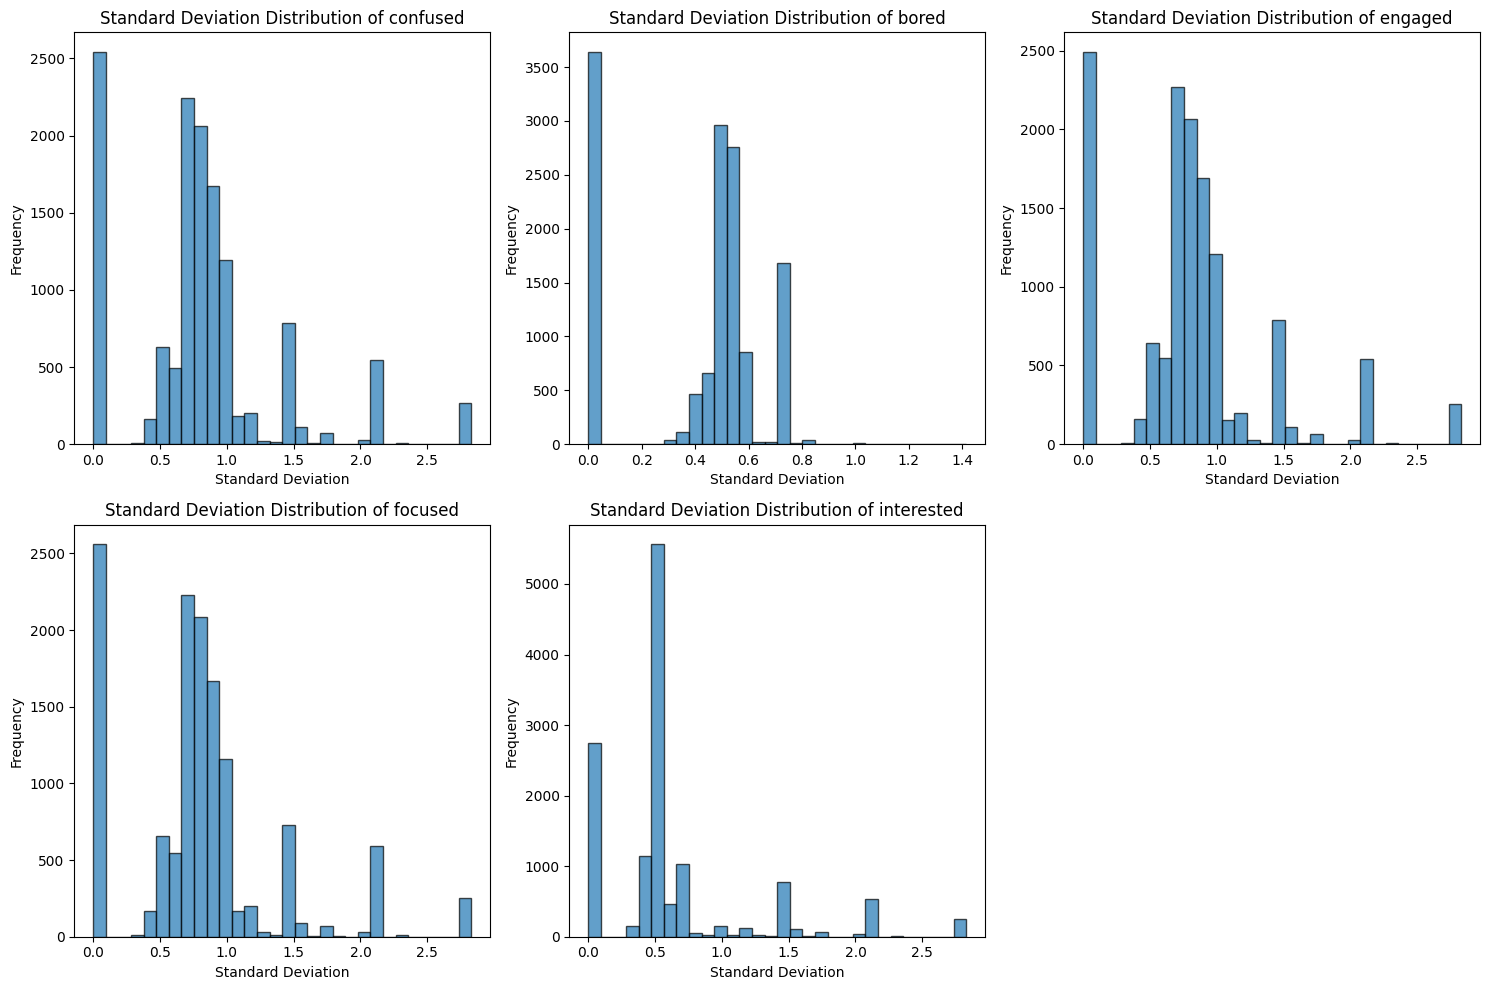

Standard deviation values for each emotion across videos:
confused: [0.8864052604279183, 1.4142135623730951, 1.0954451150103321, 0.6900655593423541, 2.1213203435596424, 0.9189365834726814, 0.6408699444616557, 0.7071067811865476, 0.7440238091428449, 0.6900655593423543, 0.0, 0.8997354108424372, 1.4142135623730951, 0.8997354108424372, 0.6666666666666667, nan, 0.8333333333333334, 0.816496580927726, 0.7378647873726218, 0.5175491695067657, 0.7559289460184544, 0.4472135954999579, 1.7320508075688772, 0.7071067811865476, 0.7071067811865476, 1.0, nan, 0.7071067811865476, nan, nan, nan, nan, 0.9486832980505138, 0.3333333333333333, 0.8997354108424372, 2.1213203435596424, nan, 0.0, 2.1213203435596424, 0.8345229603962802, 0.927960727138337, 0.9428090415820634, 0.9189365834726815, 0.8997354108424372, 1.4142135623730951, 0.0, 0.816496580927726, 0.0, 0.7440238091428449, nan, 2.1213203435596424, 0.5773502691896257, 0.9831920802501751, 0.7888106377466154, 0.0, 1.0, 0.8864052604279183, 0.7071067811865476,

In [66]:
emotions = ['confused', 'bored', 'engaged', 'focused', 'interested']
plot_std_distribution_per_df(df_list_edit4half, emotions)

### Further Filtering

In [69]:
# Initialize a new list to store filtered DataFrames
filtered_df_list = []

# Iterate over each DataFrame in df_list_edit4half
for df in df_list_edit4half:
    # Calculate the standard deviation for each specified emotion
    std = df[emotions].std()

    # Check if all standard deviations are less than or equal to 1.75
    if all(std[emotion] <= 1.75 for emotion in emotions):
        filtered_df_list.append(df)

# Display the number of DataFrames retained after filtering
print(f"Number of DataFrames after filtering: {len(filtered_df_list)}")


Number of DataFrames after filtering: 10920


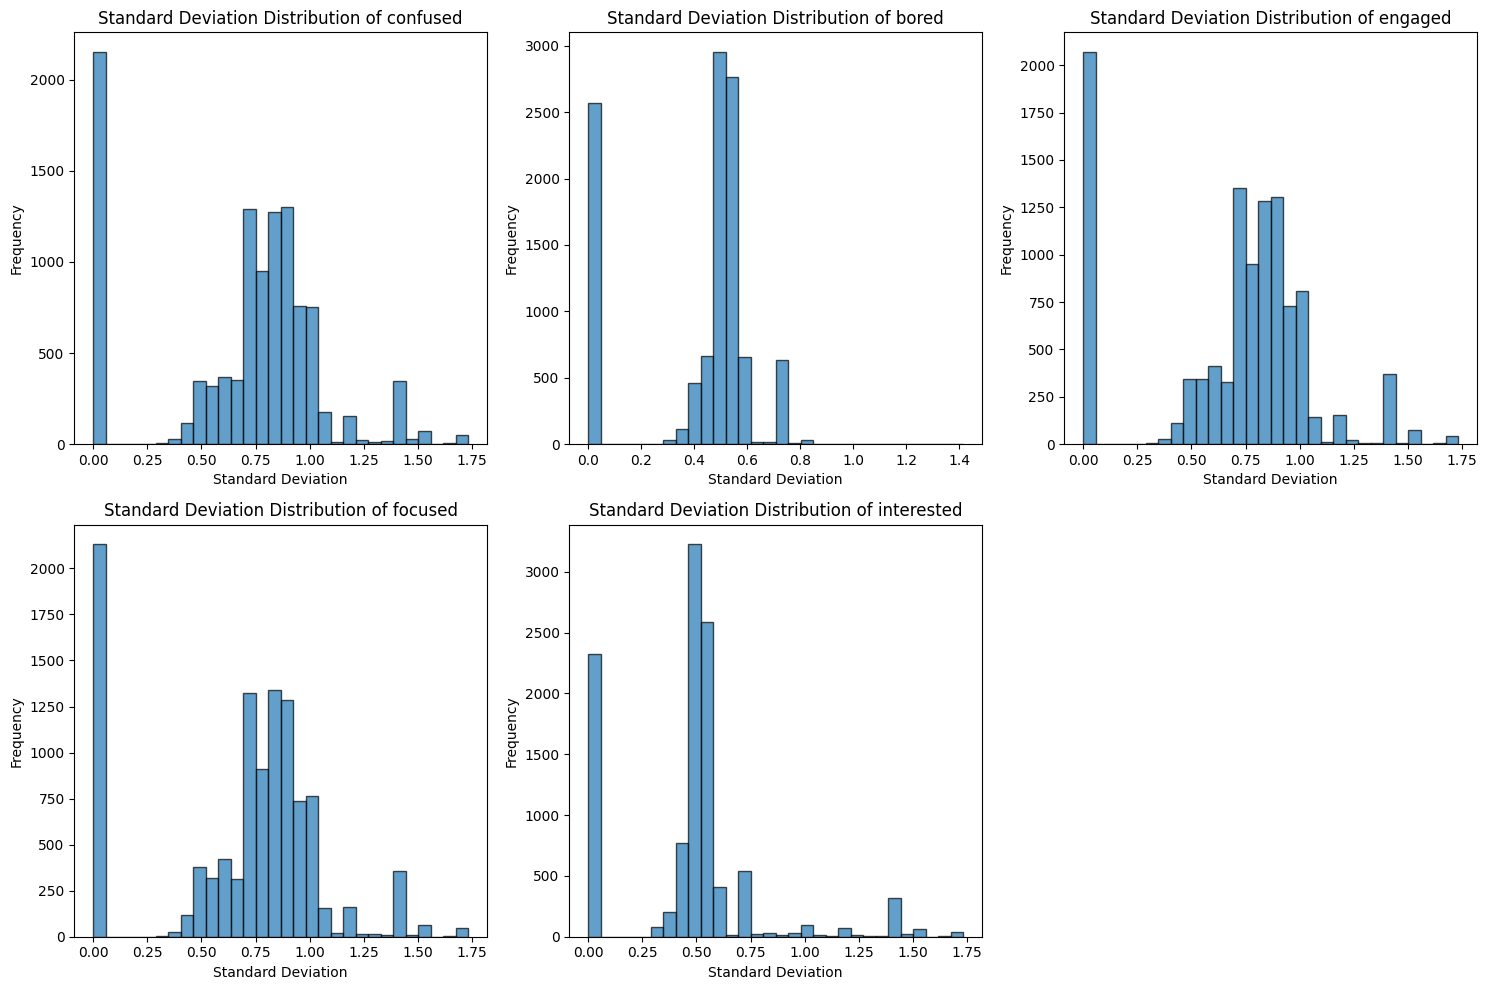

Standard deviation values for each emotion across videos:
confused: [0.8864052604279183, 1.0954451150103321, 0.6900655593423541, 0.9189365834726814, 0.6408699444616557, 0.7440238091428449, 0.6900655593423543, 0.0, 0.8997354108424372, 1.4142135623730951, 0.8997354108424372, 0.6666666666666667, 0.8333333333333334, 0.816496580927726, 0.7378647873726218, 0.5175491695067657, 0.7559289460184544, 0.4472135954999579, 0.7071067811865476, 1.0, 0.9486832980505138, 0.3333333333333333, 0.8997354108424372, 0.0, 0.8345229603962802, 0.927960727138337, 0.9428090415820634, 0.9189365834726815, 0.8997354108424372, 0.0, 0.816496580927726, 0.0, 0.7440238091428449, 0.5773502691896257, 0.9831920802501751, 0.7888106377466154, 1.0, 0.8864052604279183, 0.9511897312113418, 0.0, 0.7071067811865476, 0.816496580927726, 0.8997354108424372, 0.7071067811865476, 1.1547005383792517, 0.8997354108424372, 0.5, 0.7817359599705717, 0.927960727138337, 0.7378647873726218, 1.0327955589886446, 0.5477225575051661, 0.0, 1.516575088

In [70]:
plot_std_distribution_per_df(filtered_df_list, emotions)

### **Combined the Attributes for a single Engagement Score**

In [71]:
# Return the filtered dataframe list into a big dataframe, groupby, and then take mean by Video, to aggregate for a single Engagement score

# df_list_edit4half is the dataframe list

df_profil = pd.concat(filtered_df_list, ignore_index=True)
df_profil

video_title  _worker_id  professor_engaging  confused  ...  engaged  focused  interested  context
0      05082021_Catherine_1_Ammmy_1.mp4    46173120                   1         4  ...        4        5           4      7.0
1      05082021_Catherine_1_Ammmy_1.mp4    46380325                   1         3  ...        5        5           3      7.0
2      05082021_Catherine_1_Ammmy_1.mp4    46400290                   1         4  ...        4        5           3      7.0
3      05082021_Catherine_1_Ammmy_1.mp4    46076183                   1         5  ...        3        3           4      7.0
4      05082021_Catherine_1_Ammmy_1.mp4    46538326                   1         5  ...        4        4           4      7.0
...                                 ...         ...                 ...       ...  ...      ...      ...         ...      ...
71355    23092021_Pierre_9_Sophie_9.mp4    45634244                   1         5  ...        4        3           3      7.0
71356    23092021_Pierre_9_Sophie_9.mp4    46545083                   1         5  ...        4        4           3      7.0
71357    23092021_Pierre_9_Sophie_9.mp4    46107579                   1         5  ...        3        4           4      7.0
71358    23092021_Pierre_9_Sophie_9.mp4    47033514                   1         5  ...        4        3           4      7.0
71359    23092021_Pierre_9_Sophie_9.mp4    47032453                   1         3  ...        3        3           4      7.0

[71360 rows x 9 columns]

In [72]:
df_profil_single = df_profil.groupby(['video_title'], as_index = False).mean()
df_profil_single = df_profil_single.drop(columns=['_worker_id','context','professor_engaging'])
df_profil_single.describe()

# the values of negative attributes are original at this point

confused         bored       engaged       focused    interested
count  10920.000000  10920.000000  10920.000000  10920.000000  10920.000000
mean       3.933302      3.292434      3.643403      3.664155      3.461922
std        0.835968      0.616559      0.738957      0.725124      0.567884
min        1.000000      1.000000      1.000000      1.000000      1.000000
25%        3.714286      3.000000      3.000000      3.138393      3.333333
50%        4.000000      3.428571      3.857143      3.875000      3.500000
75%        4.333333      3.600000      4.125000      4.142857      3.750000
max        5.000000      5.000000      5.000000      5.000000      5.000000

In [ ]:
# df_profil_single['Aggr_eng'] = df_profil_single['interested']+df_profil_single['focused'] + df_profil_single['engaged'] - df_profil_single['bored'] - df_profil_single['confused']
# df_profil_single.describe()
# # Do we really need this step?

## **Visualization of the sample**

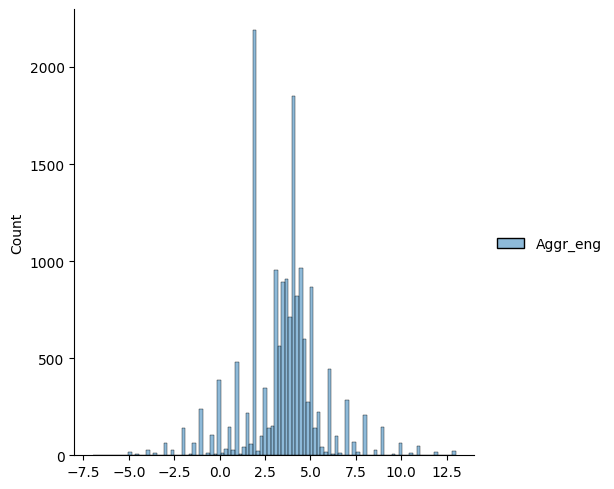

In [ ]:
sns.displot(df_profil_single[['Aggr_eng']])
# Generally Normally Distributed?

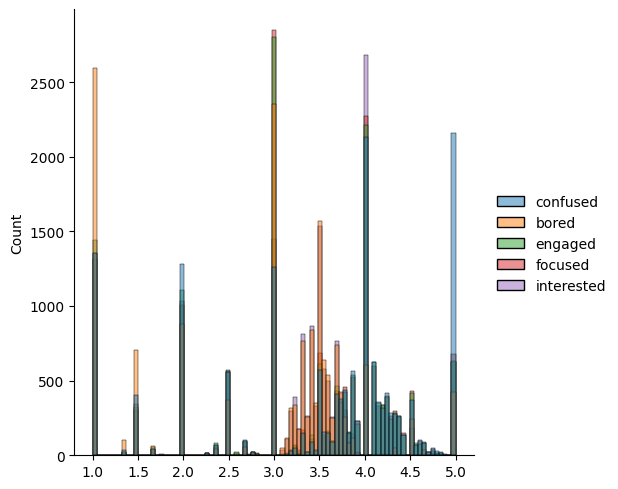

In [ ]:
sns.displot(df_profil_single[['confused','bored', 'engaged', 'focused', 'interested']])

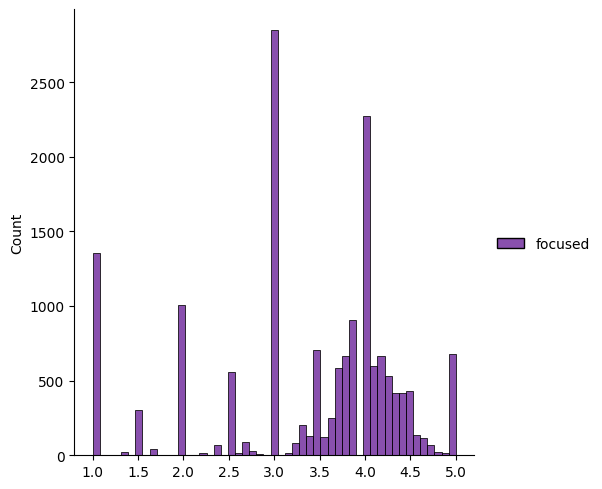

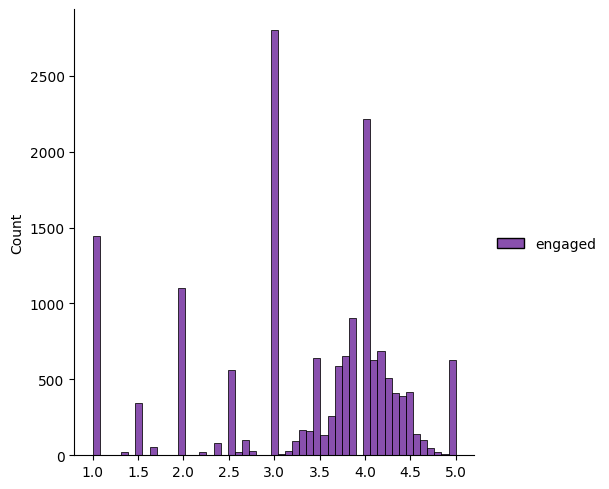

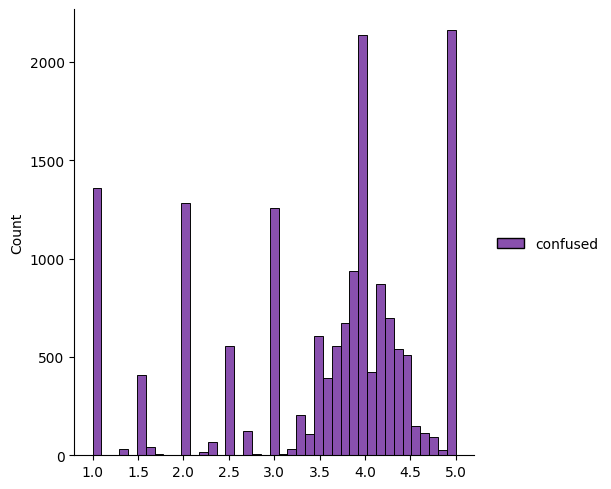

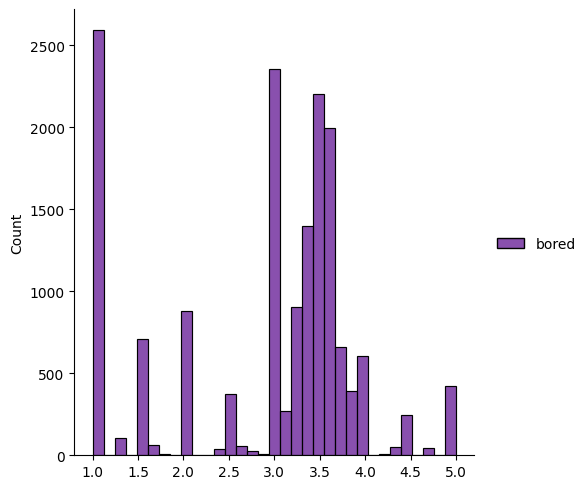

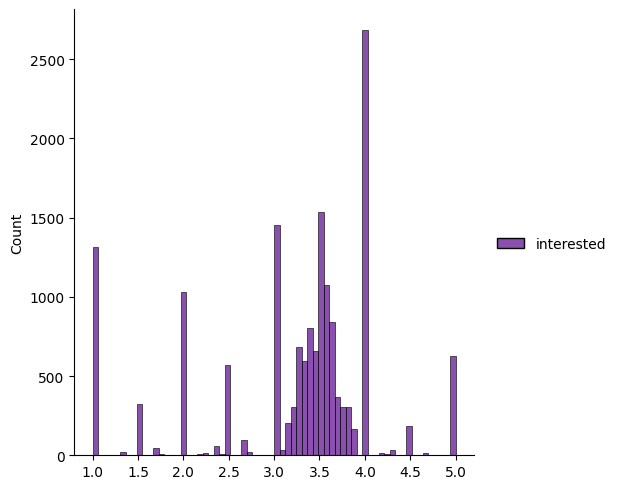

In [ ]:
sns.displot(df_profil_single[['focused']], palette=["#57068c"], alpha = 0.7)
sns.displot(df_profil_single[['engaged']], palette=["#57068c"], alpha = 0.7)
sns.displot(df_profil_single[['confused']], palette=["#57068c"], alpha = 0.7)
sns.displot(df_profil_single[['bored']], palette=["#57068c"], alpha = 0.7)
sns.displot(df_profil_single[['interested']], palette=["#57068c"], alpha = 0.7)

# Will this have any problem?

## **Consistency Check with the Video Data**

In [ ]:
# Data Import
# Load dataset into df and drop contributor info


train_in_video_df = pd.read_csv("/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /data_filename/train_filename.csv",header=None)
test_in_video_df = pd.read_csv("/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /data_filename/test_filename.csv",header=None)
valid_in_video_df = pd.read_csv("/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /data_filename/valid_filename.csv",header=None)

In [ ]:
train_in_video_df

0
0     05082021_Catherine_1_Ammmy_101.mp4
1      05082021_Catherine_1_Ammmy_12.mp4
2      05082021_Catherine_1_Ammmy_14.mp4
3      05082021_Catherine_1_Ammmy_16.mp4
4      05082021_Catherine_1_Ammmy_18.mp4
...                                  ...
9841      23092021_Pierre_9_Sophie_2.mp4
9842      23092021_Pierre_9_Sophie_4.mp4
9843      23092021_Pierre_9_Sophie_7.mp4
9844      23092021_Pierre_9_Sophie_8.mp4
9845                  train_filename.csv

[9846 rows x 1 columns]

In [ ]:
# Format Handlings
# train_in_video_df['.'] = train_in_video_df['.'].str.replace(r'^\./', '', regex=True)
# test_in_video_df['.'] = test_in_video_df['.'].str.replace(r'^\./', '', regex=True)
# valid_in_video_df['.'] = valid_in_video_df['.'].str.replace(r'^\./', '', regex=True)

In [ ]:
set_train = set(train_in_video_df[0])
set_test = set(test_in_video_df[0])
set_valid = set(valid_in_video_df[0])
set_profil = set(df_profil_single['video_title'])



train_in_both = list(set_train.intersection(set_profil))
test_in_both = list(set_test.intersection(set_profil))
valid_in_both = list(set_valid.intersection(set_profil))

# df_profil_single['video_title']

print("overlapped with training",len(train_in_both))
print("overlapped with testing",len(test_in_both))
print("overlapped with valid",len(valid_in_both))

overlapped with training 9845
overlapped with testing 3283
overlapped with valid 3283


# **Align Annotations with Videos**

1. Distribution of the current split
2. Align with the filtering
3. Packaging for Annotations

### **Check the distribution of the three profs**

In [73]:
import re

def count_and_percentage(items, set_name):
    count_catherine = 0
    count_pierre = 0
    count_nigel = 0

    # Define regex patterns
    pattern_catherine = re.compile(r'^\d+_Catherine')
    pattern_pierre = re.compile(r'^\d+_Pierre')
    pattern_nigel = re.compile(r'^\d+_Nigel')

    # Iterate through the list and count occurrences
    for item in items:
        if pattern_catherine.search(item):
            count_catherine += 1
        if pattern_pierre.search(item):
            count_pierre += 1
        if pattern_nigel.search(item):
            count_nigel += 1

    # Print the counts
    print(f"{set_name} Counts:")
    print(f"Catherine: {count_catherine}")
    print(f"Pierre: {count_pierre}")
    print(f"Nigel: {count_nigel}")

    total = len(items)

    if total > 0:
        print(f"In {set_name} the percentage of Catherine : Pierre : Nigel = {count_catherine/total:.2%} : {count_pierre/total:.2%} : {count_nigel/total:.2%}")
    else:
        print(f"In {set_name} the percentage of Catherine : Pierre : Nigel = 0% : 0% : 0%")


count_and_percentage(train_in_both, "train")
count_and_percentage(test_in_both, "test")
count_and_percentage(valid_in_both, "valid")


NameError: name 'train_in_both' is not defined

**Explaination: When checking if the samples in train, test,valid are evenly distributed for the three professors's lecture, I found that Nigel's video is relatively high in the valid batch, so I decided to move one video of nigel from valid to train in order to satisfy the splitting ratio (6:2:2) **



```
mv ./07082021_Nigel_2_AlexZhaoyang_15.mp4  ../train
```



After balancing train, test, valid and the three professors
here is the number of files

In [ ]:
# Unnecessary for future execution

train_in_both.append('07082021_Nigel_2_AlexZhaoyang_15.mp4')
valid_in_both.remove('07082021_Nigel_2_AlexZhaoyang_15.mp4')

print("Training",len(train_in_both))
print("Testing",len(test_in_both))
print("Valid",len(valid_in_both))

Training 9845
Testing 3283
Valid 3283


In [ ]:
# Unnecessary for future execution

# count_and_percentage(train_in_both, "train")
# count_and_percentage(test_in_both, "test")
# count_and_percentage(valid_in_both, "valid")


train Counts:
Catherine: 5018
Pierre: 1524
Nigel: 1278
In train the percentage of Catherine : Pierre : Nigel = 50.97% : 15.48% : 12.98%
test Counts:
Catherine: 1629
Pierre: 543
Nigel: 398
In test the percentage of Catherine : Pierre : Nigel = 49.62% : 16.54% : 12.12%
valid Counts:
Catherine: 1622
Pierre: 481
Nigel: 442
In valid the percentage of Catherine : Pierre : Nigel = 49.41% : 14.65% : 13.46%


### **Ensure Consistencies in the ideal dataset and the current dataset on HPC**

(perform only once)

> **Now there is still some videos in the train, test, valid that is not in the "both" list cuz they have been filtered out in the annotations,**

> **Now I will take the unused videos out of the three respective folders.  to do that, i will need to know which are in train_in_video_df but not in train_in_both list.**

1. Identify which files are not in the desire list (in current but not in ideal)
2. In HPC perform the action of clearing them out
3. Check consistencies from two ways

In [ ]:
# Unnecessary for future execution

# df_values = set(train_in_video_df['.'])
# list_values = set(train_in_both)
# values_not_in_list = df_values - list_values
# result_df = pd.DataFrame(values_not_in_list, columns=['Values'])

In [ ]:
# Unnecessary for future execution

# def find_values_not_in_list(dataframe, column_name, compare_list):

#     # Extract values from DataFrame column and convert to a set
#     df_values = set(dataframe[column_name])

#     # Convert list values to a set
#     list_values = set(compare_list)

#     # Identify values in the DataFrame but not in the list
#     values_not_in_list = df_values - list_values

#     # Convert the result to a DataFrame
#     result_df = pd.DataFrame(values_not_in_list, columns=['Values'])

#     # Write the resulting DataFrame to a CSV file
#     # result_df.to_csv(output_csv, index=False)

#     return result_df

# result_df_train = find_values_not_in_list(train_in_video_df, '.', train_in_both)
# result_df_test = find_values_not_in_list(test_in_video_df, '.', test_in_both)
# result_df_valid = find_values_not_in_list(valid_in_video_df, '.', valid_in_both)

# # Print the resulting DataFrame
# print(result_df_train)
# print(result_df_test)
# print(result_df_valid)


In [ ]:
# Unnecessary for future execution

# result_df_train.to_csv('rid_video_train.csv', index=False)
# result_df_test.to_csv('rid_video_test.csv', index = False)
# result_df_valid.to_csv('rid_video_valid.csv', index = False)

**Check for consistency between video and annotations:**




```
ls -1 | wc -l
file numbers

mv ./23092021_Pierre_9_AhmedFarrukh_27.mp4 ../rid_train_video
move files

rm filename.txt
remove files

```



Front and Back Check of Consistencies

In [ ]:
# Unnecessary for future execution

# df_veri = pd.read_csv("train_veri.csv")
# df_veri['.'] = df_veri['.'].str.replace(r'^\./', '', regex=True)

# df_values = set(df_veri['.'])
# diff = df_values - set(train_in_both)
# diff2 = set(train_in_both) - df_values

# print(diff)
# print('\n')
# print(diff2)

{'train_veri.csv'}


set()


In [ ]:
# import csv

# data = valid_in_both

# csv_file = 'valid_filename.csv'

# # Write data to CSV file
# with open(csv_file, 'w', newline='') as f:
#     writer = csv.writer(f)
#     writer.writerows(data)

# print(f"CSV file '{csv_file}' has been created.")

CSV file 'valid_filename.csv' has been created.


# **Package and Ouput Annotations**

In [ ]:
# # Two dataframes train_in_video_df, df_profil_single
# # Group the two dataframe based on df_profil_single['video_title'] == train_in_video_df[0], only keep the common parts

# # Perform an inner merge based on the condition
# df_train = pd.merge(df_profil_single, train_in_video_df, left_on='video_title', right_on=0)
# df_train = df_train.drop(columns = [0])
# df_train.to_csv('/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /df_train_.csv', index=False)


# df_test = pd.merge(df_profil_single, test_in_video_df, left_on='video_title', right_on=0)
# df_test = df_test.drop(columns = [0])
# df_test.to_csv('/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /df_test.csv', index=False)

# df_valid = pd.merge(df_profil_single, valid_in_video_df, left_on='video_title', right_on=0)
# df_valid = df_valid.drop(columns = [0])
# df_valid.to_csv('/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /df_valid.csv', index = False)

In [ ]:
# Two dataframes train_in_video_df, df_profil_single
# Group the two dataframe based on df_profil_single['video_title'] == train_in_video_df[0], only keep the common parts

# Perform an inner merge based on the condition
df_train = pd.merge(df_profil_single, train_in_video_df, left_on='video_title', right_on=0)
df_train = df_train.drop(columns = [0])
df_train.to_csv('/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /df_train_further_filter.csv', index=False)


df_test = pd.merge(df_profil_single, test_in_video_df, left_on='video_title', right_on=0)
df_test = df_test.drop(columns = [0])
df_test.to_csv('/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /df_test_further_filter.csv', index=False)

df_valid = pd.merge(df_profil_single, valid_in_video_df, left_on='video_title', right_on=0)
df_valid = df_valid.drop(columns = [0])
df_valid.to_csv('/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /df_valid_further_filter.csv', index = False)

video_title  confused     bored   engaged  \
0      05082021_Catherine_1_Ammmy_10.mp4  3.000000  1.000000  3.000000   
1     05082021_Catherine_1_Ammmy_102.mp4  2.500000  1.000000  4.000000   
2     05082021_Catherine_1_Ammmy_103.mp4  4.200000  3.400000  4.400000   
3      05082021_Catherine_1_Ammmy_13.mp4  3.857143  3.142857  3.857143   
4      05082021_Catherine_1_Ammmy_15.mp4  4.142857  3.714286  4.000000   
...                                  ...       ...       ...       ...   
3278     23092021_Pierre_9_Sophie_10.mp4  4.444444  3.444444  3.333333   
3279     23092021_Pierre_9_Sophie_16.mp4  1.000000  1.000000  1.000000   
3280     23092021_Pierre_9_Sophie_22.mp4  3.000000  4.000000  2.000000   
3281     23092021_Pierre_9_Sophie_26.mp4  4.000000  3.625000  4.125000   
3282     23092021_Pierre_9_Sophie_28.mp4  4.571429  3.857143  4.000000   

       focused  interested  
0     3.500000    3.500000  
1     2.500000    1.500000  
2     4.000000    3.100000  
3     3.285714    3.857143  
4     3.714286    3.142857  
...        ...         ...  
3278  4.444444    3.666667  
3279  3.000000    1.000000  
3280  1.000000    2.500000  
3281  4.000000    3.250000  
3282  3.714286    4.000000  

[3283 rows x 6 columns]

Packaging to pkl

In [ ]:
## Use when needed to import the files from folder

# import os
# from google.colab import drive

# drive.mount('/content/gdrive/', force_remount=True)

In [ ]:
# CSV - Normalization - Dictionary - JSON file (one time for each train,test,valid)

import json
import pickle

train_csv = '/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /df_train.csv'
test_csv = '/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /df_test.csv'
valid_csv = '/content/gdrive/MyDrive/Capstone_Alia_Catherine/【2024.7 Update 】 /df_valid.csv'

# read the CSV file
df_train = pd.read_csv(train_csv)
df_test = pd.read_csv(test_csv)
df_valid = pd.read_csv(valid_csv)

In [ ]:
def normalization(df):
  min_value = df.iloc[:, 1:].values.min()
  max_value = df.iloc[:, 1:].values.max()
  df_normalized = (df.iloc[:, 1:] - min_value) / (max_value - min_value)
  df_normalized = pd.concat([df.iloc[:, 0], df_normalized], axis=1)
  return df_normalized

In [ ]:
df_train_normalized  = normalization(df_train)
df_test_normalized = normalization(df_test)
df_valid_normalized = normalization(df_valid)

In [ ]:
def populate_dic(df_normalized):
  result = {'openness': {}, 'conscientiousness': {}, 'extraversion': {}, 'agreeableness': {}, 'neuroticism': {}}
  for i, video_title in enumerate(df_normalized['video_title']):
    video_title = video_title.split('.')[0] + '.mp4' # extract the video title without the file extension
    result['openness'][video_title] = df_normalized.iloc[i, 1]
    result['conscientiousness'][video_title] = df_normalized.iloc[i, 2]
    result['extraversion'][video_title] = df_normalized.iloc[i, 3]
    result['agreeableness'][video_title] = df_normalized.iloc[i, 4]
    result['neuroticism'][video_title] = df_normalized.iloc[i, 5]
  return result

result_train = populate_dic(df_train_normalized)
result_valid = populate_dic(df_valid_normalized)
result_test = populate_dic(df_test_normalized)

In [ ]:
# Verify the dictionary

def get_dict_shape(d):
    # Number of keys in the dictionary
    num_keys = len(d)

    # Number of items associated with each key
    # We assume that the dictionary values are iterables (like lists, sets, or other dictionaries)
    key_lengths = {key: len(value) for key, value in d.items()}

    return num_keys, key_lengths

num_keys, key_lengths = get_dict_shape(result_valid)

print(f"Number of keys: {num_keys}")
print(f"Number of items associated with each key: {key_lengths}")

Number of keys: 5
Number of items associated with each key: {'openness': 3283, 'conscientiousness': 3283, 'extraversion': 3283, 'agreeableness': 3283, 'neuroticism': 3283}


In [ ]:
# save to JSON

def save_json(filename,result):

  # save the result dictionary to a JSON file
  with open(filename + '.json', 'w') as f:
      json.dump(result, f)

  # load the JSON file
  with open(filename + '.json', 'r') as f:
      result_dict = json.load(f)

  # save the result dictionary as a pickle file
  with open(filename +'.pkl', 'wb') as f:
      pickle.dump(result_dict, f)

  # download the pickle file
  from google.colab import files
  files.download(filename +'.pkl')

  return

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
save_json('annotation_train',result_train)
save_json('annotation_test',result_test)
save_json('annotation_valid',result_valid)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>